In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
%store -r

In [103]:
sensors = list(dataframes.keys())

In [111]:
for sensor in sensors:
    #print(sensor)
    #print(dataframes[sensor].shape[0])
    dataframes[sensor].dropna(inplace=True)
    #print(dataframes[sensor].shape[0])

In [105]:
sns.set(rc = {'figure.figsize':(18,9)})
%config InlineBackend.figure_format = 'retina'

In [106]:
failing_detail = {}
missing = {}

for i in range(len(sensors[15:16])):
    df = dataframes[sensors[i]]
    # Convert the 'time' column to datetime format (if it's not already)
    df['time'] = pd.to_datetime(df['time'])

    # Sort the DataFrame by the 'time' column
    df.sort_values('time', inplace=True)

    # Calculate the time difference between consecutive rows
    time_diff = df['time'].diff()

    # Find the indexes where the time difference is greater than one hour (3600 seconds)
    missing_indexes = time_diff[time_diff >= pd.Timedelta(hours=1)].index

    missing[sensors[i]] = missing_indexes

    num = len(missing_indexes)

    # maintaining recored of failure for analysis
    failing_detail[sensors[i]] = num

In [148]:
def agg_func(x):
    df = x.to_frame()
    #print(df)
    for i in range(df.shape[0]-1):
        if df['f_cnt'][i] > df['f_cnt'][i+1]:
            #print('true')
            return None
            #return (x.count())/( 2 + (df['f_cnt'][i]-df['f_cnt'][0])+(df['f_cnt'][-1]-df['f_cnt'][i+1]))
    return (x.count())/((x.max() - x.min())+1)    

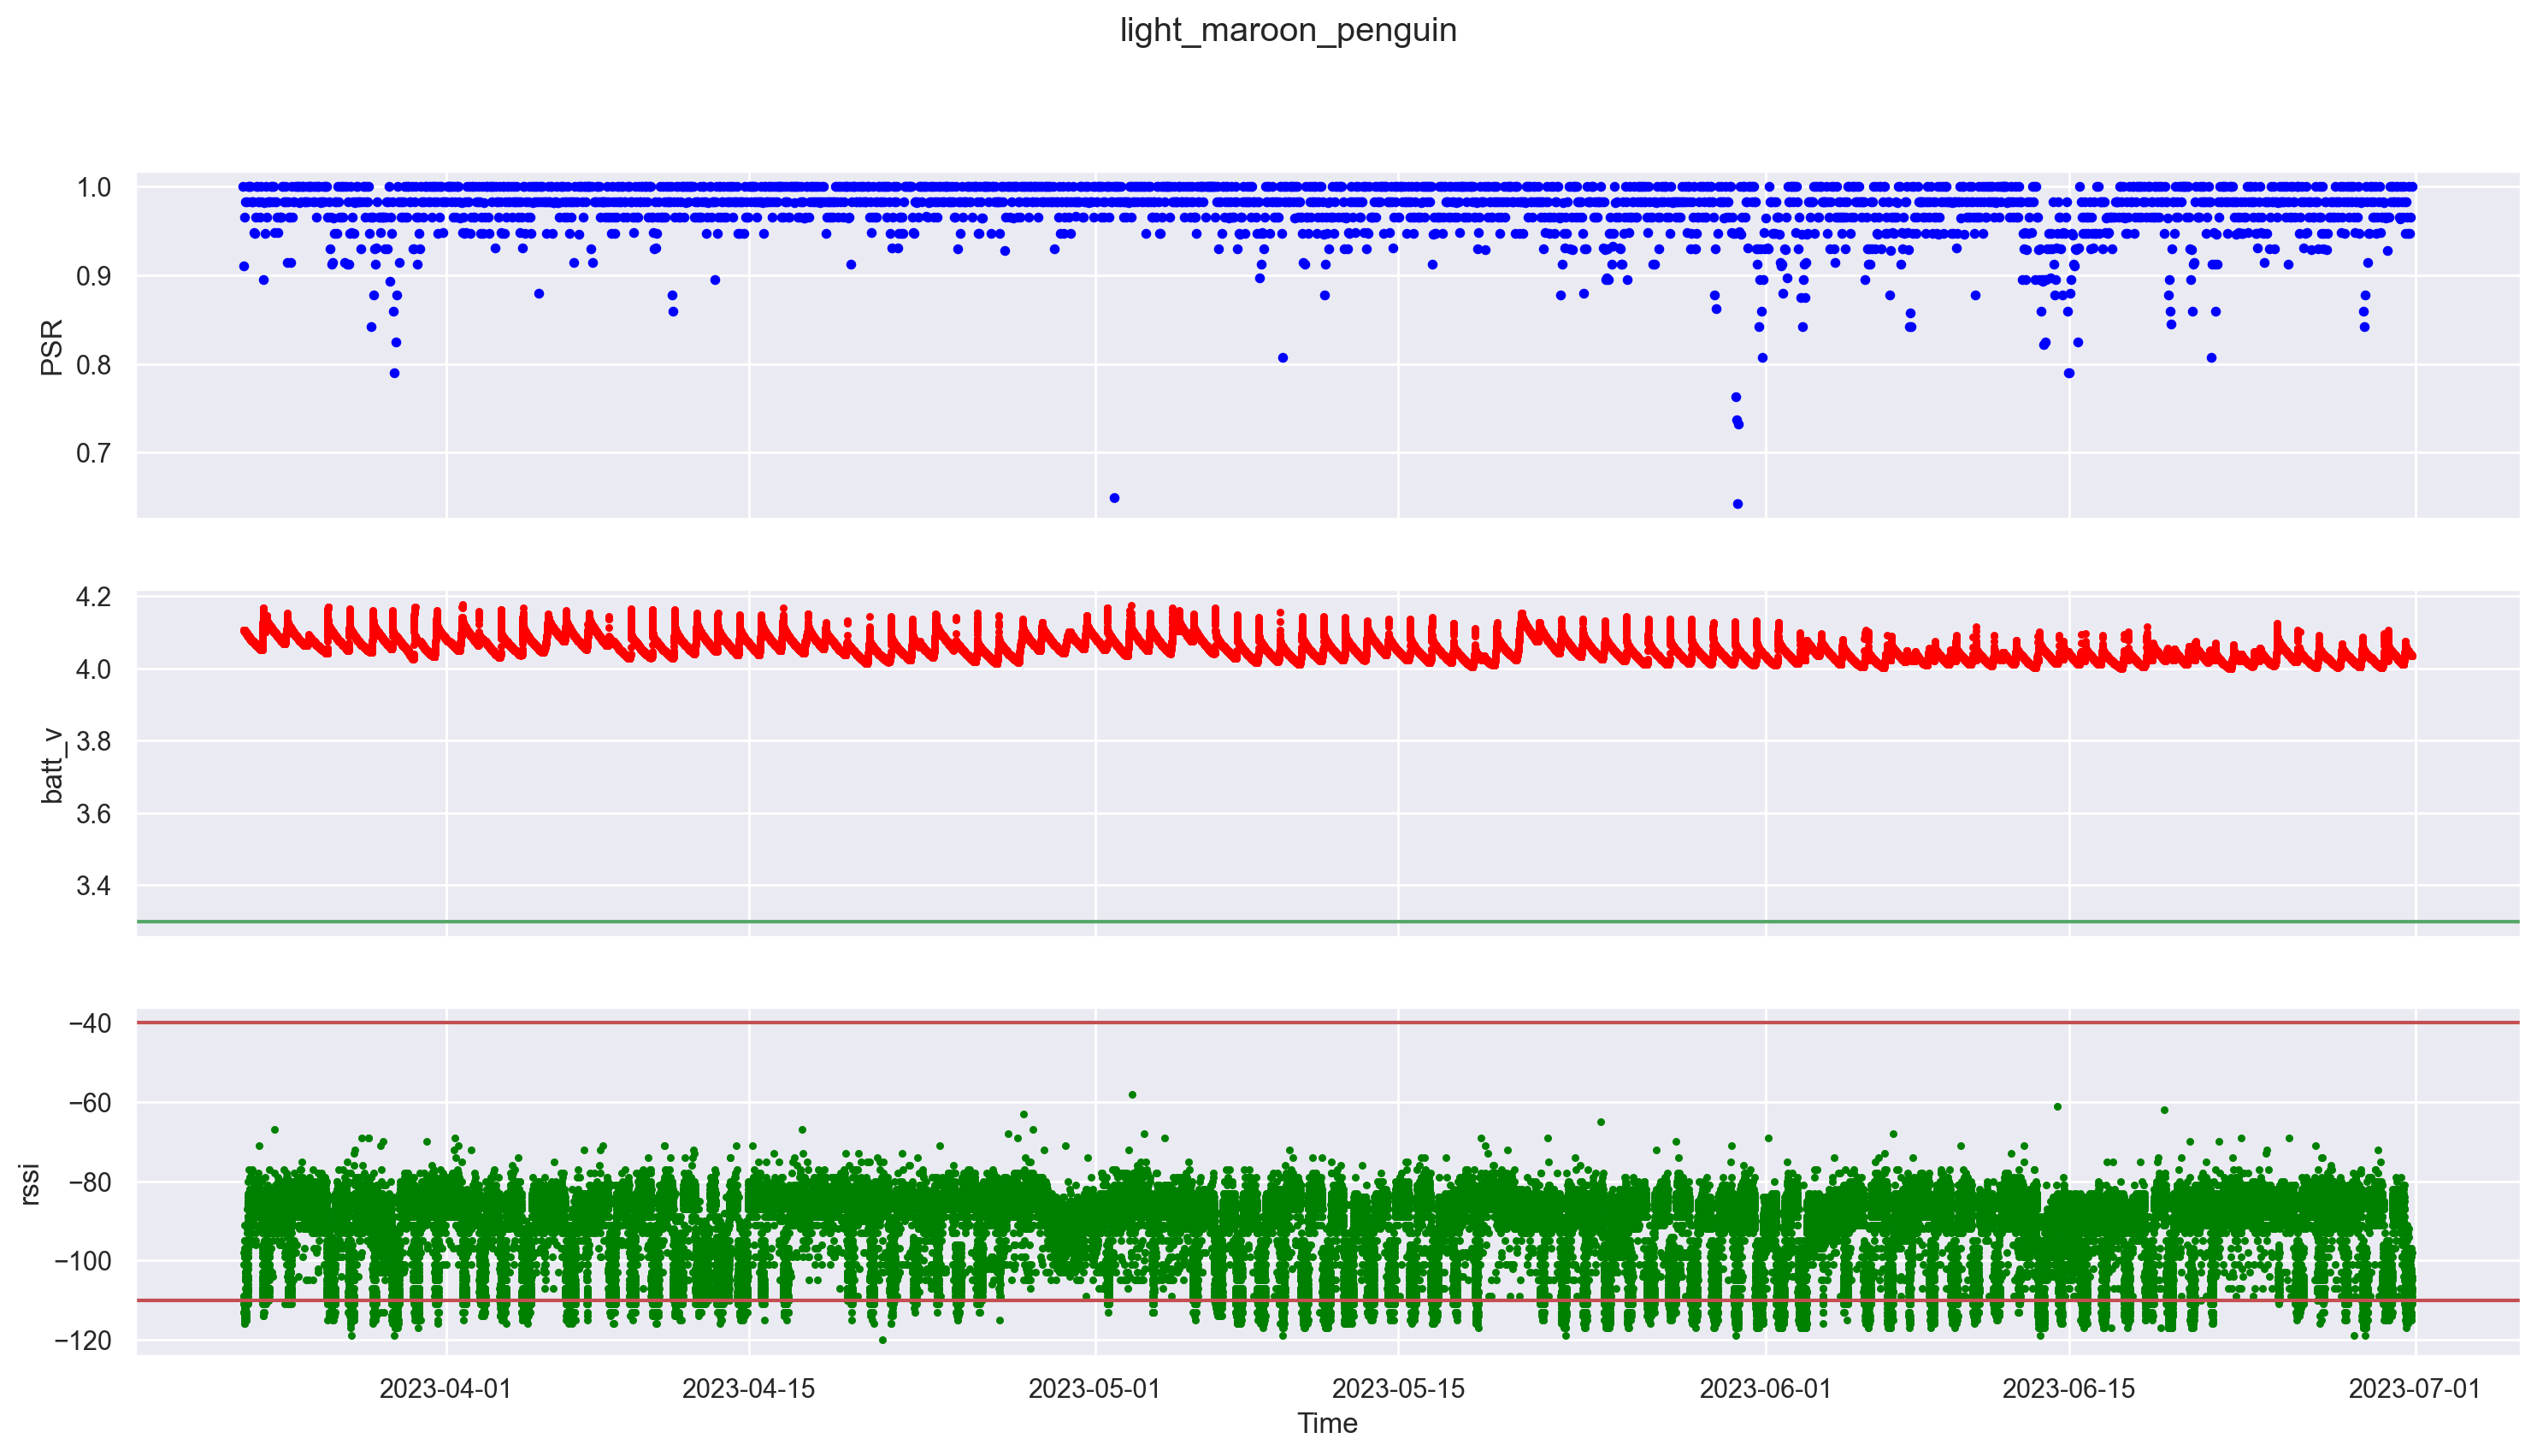

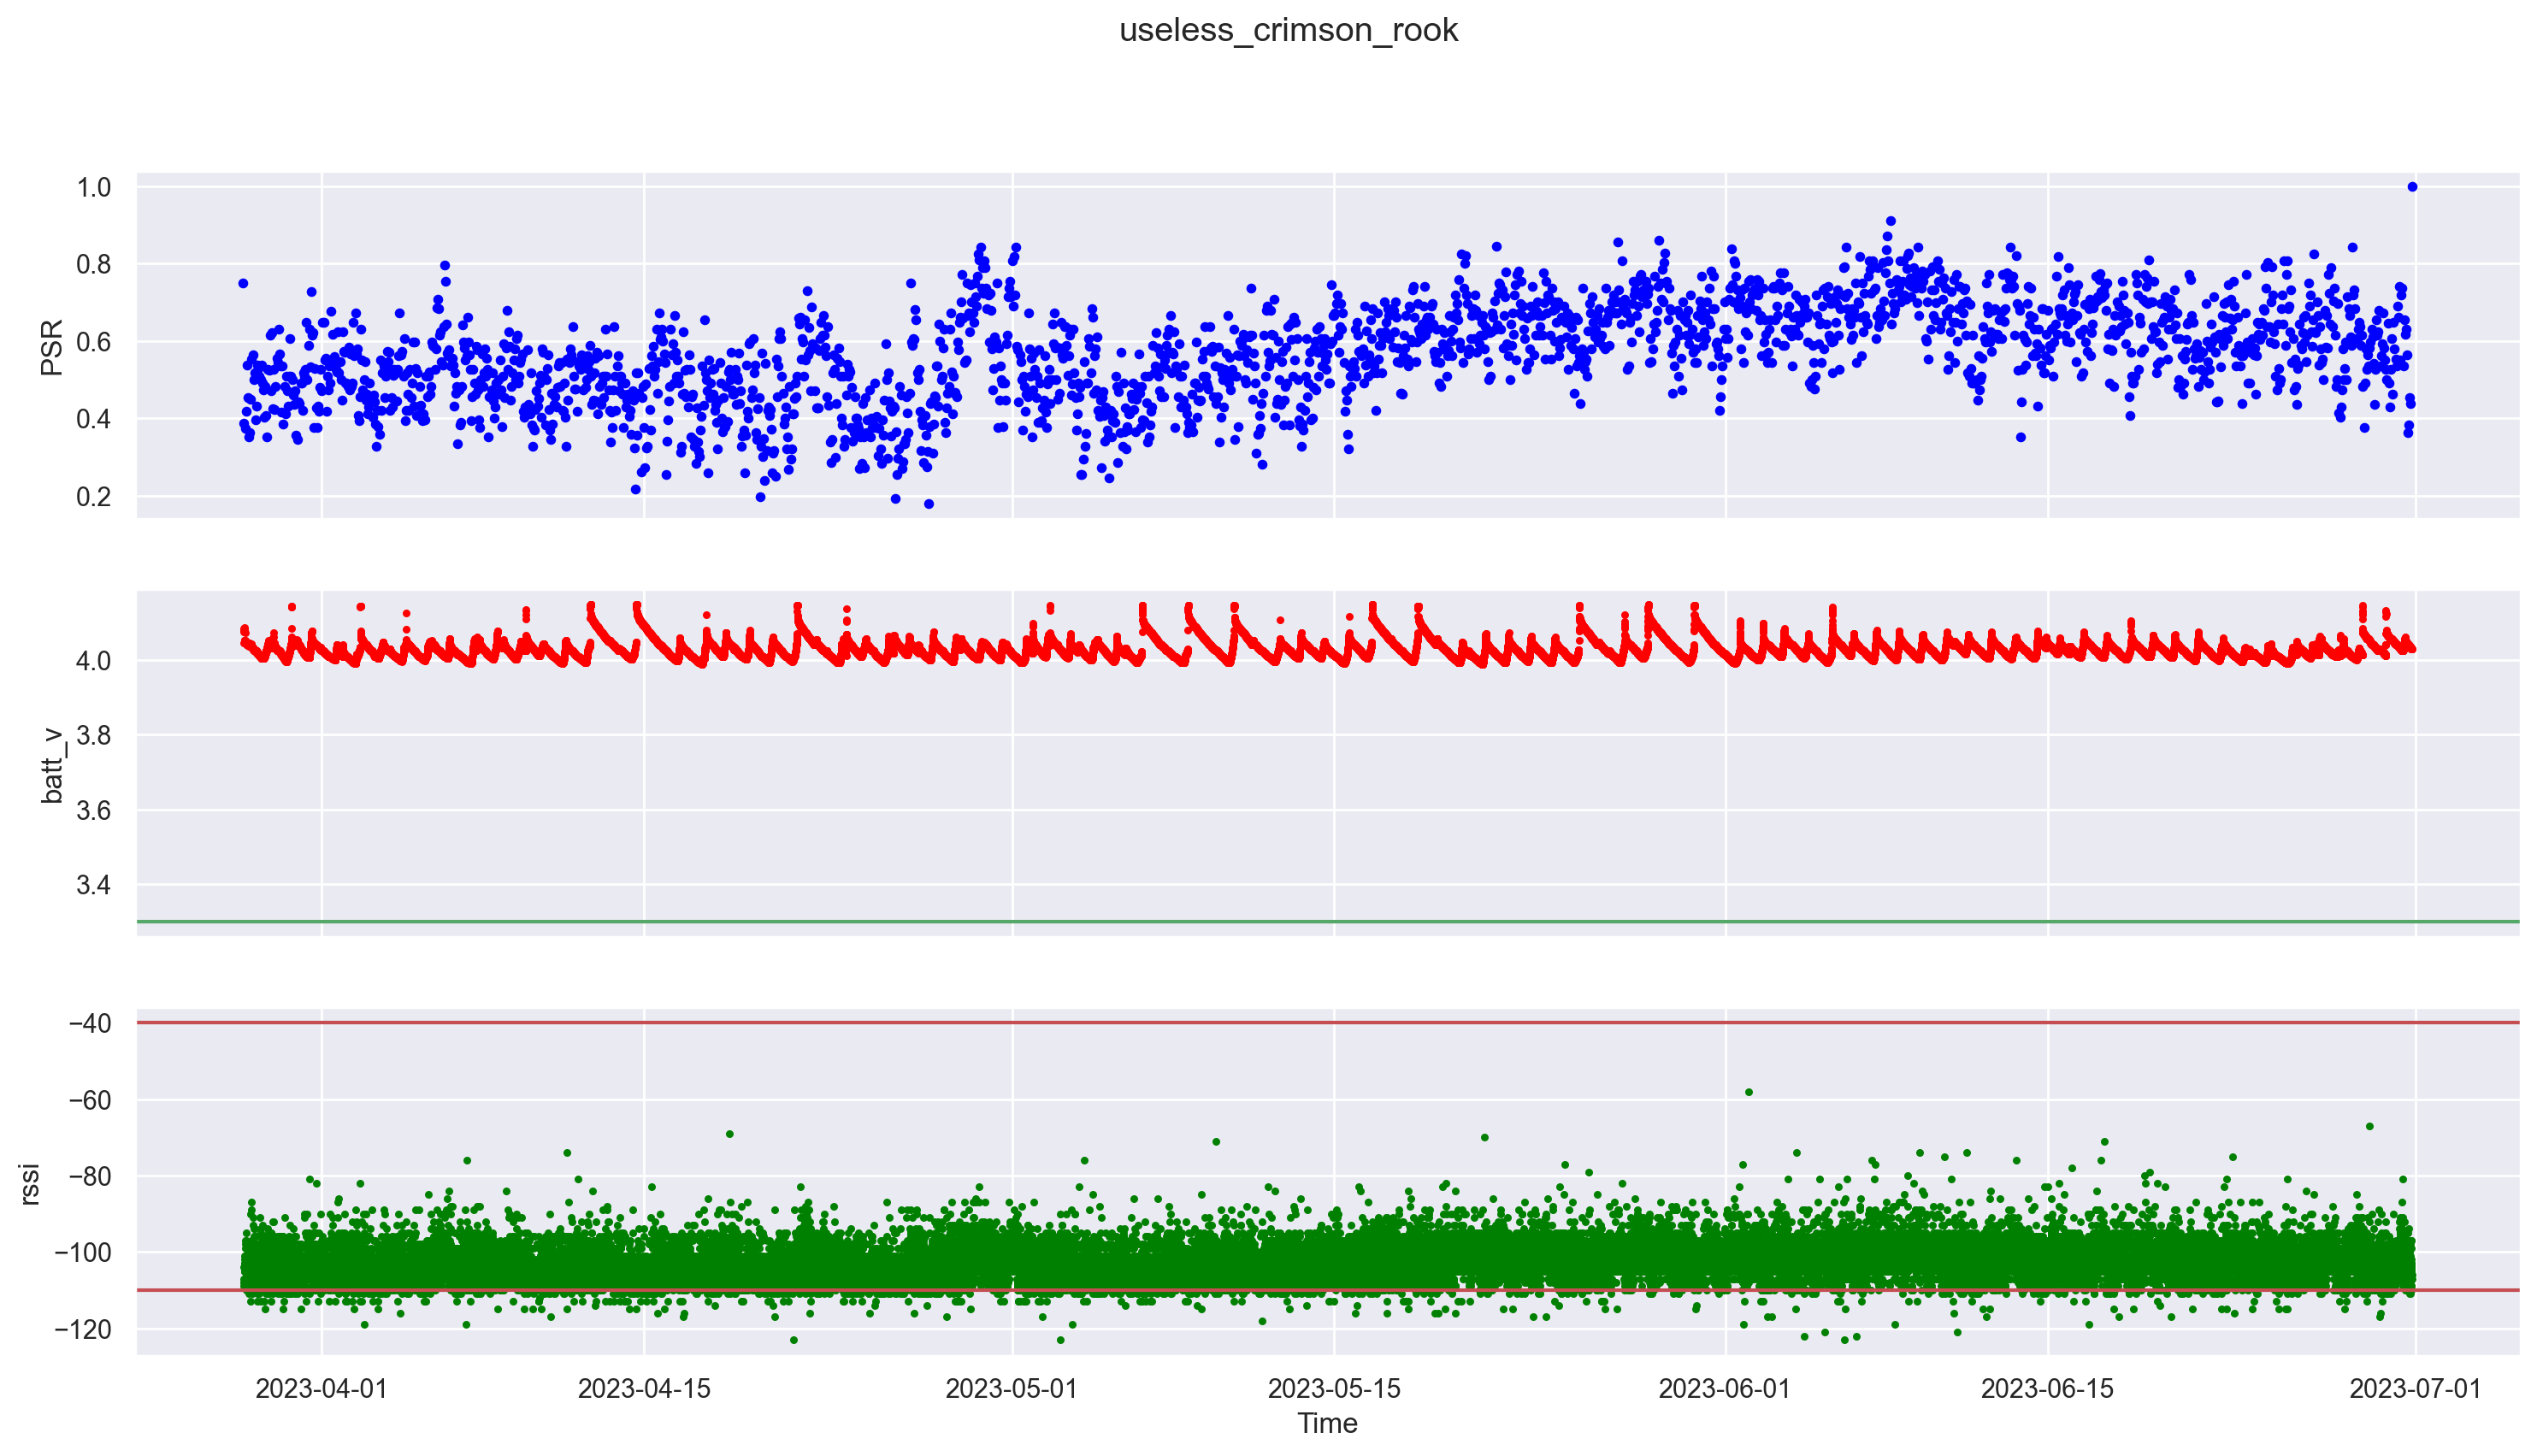

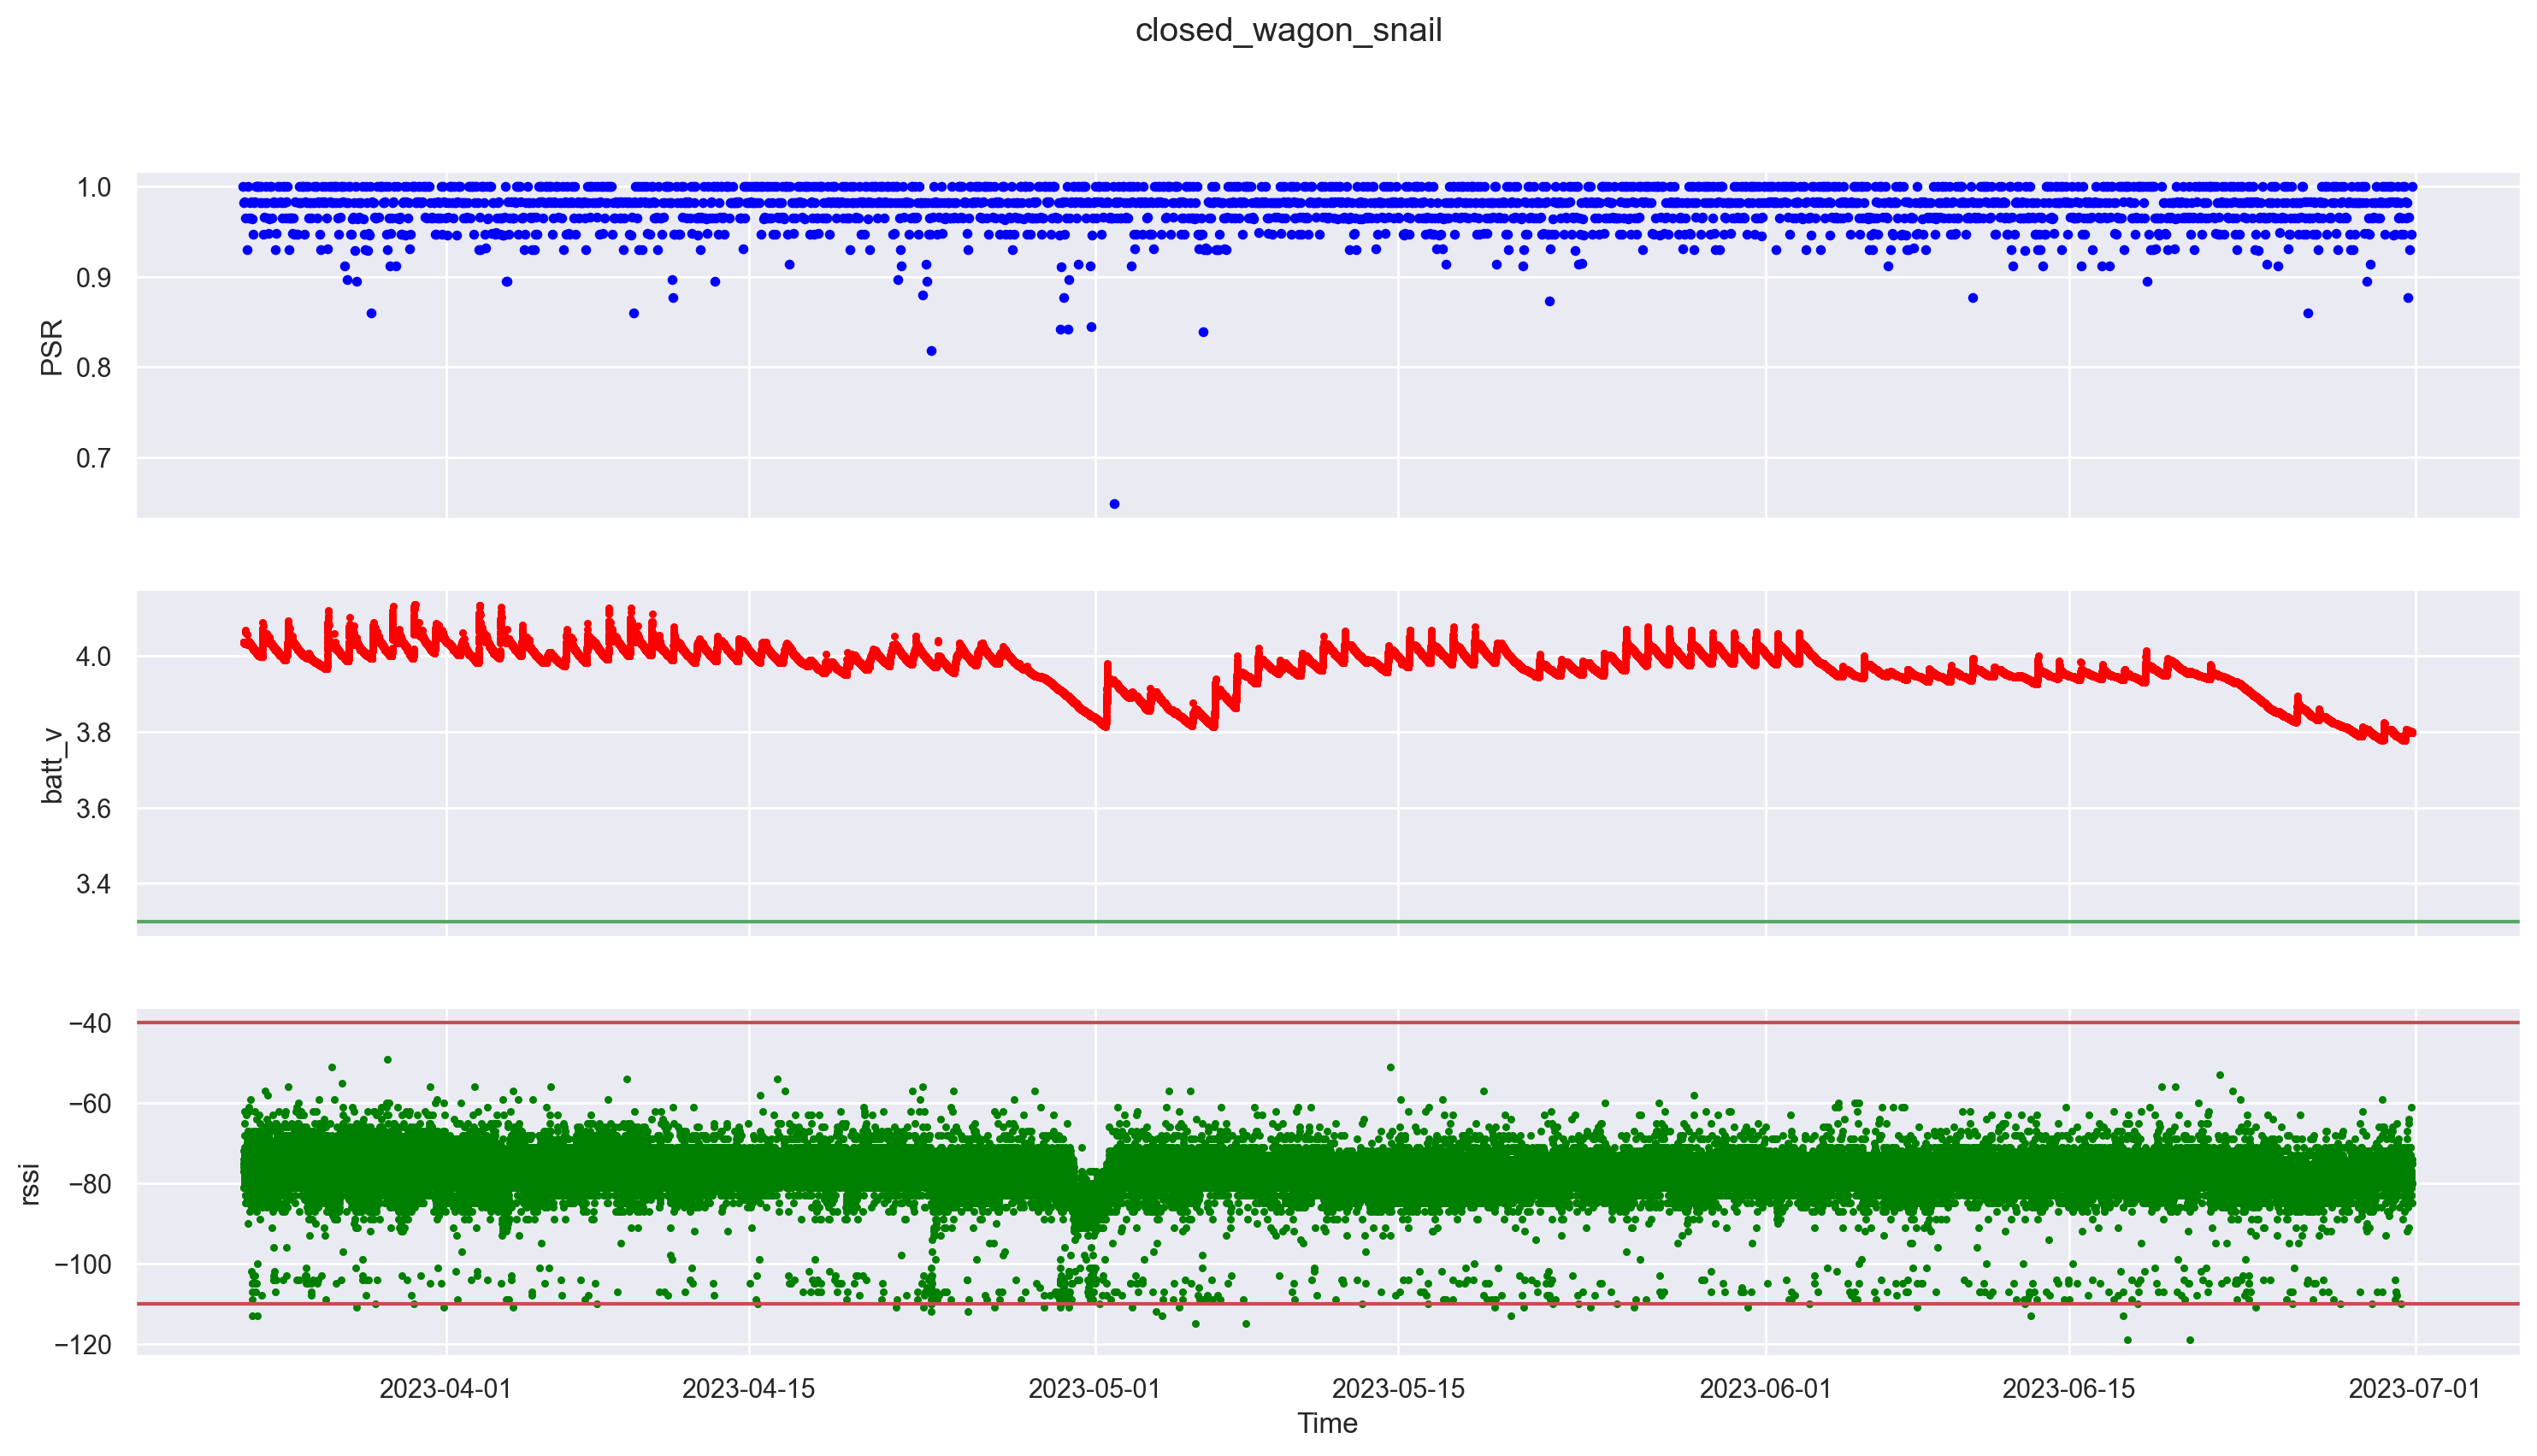

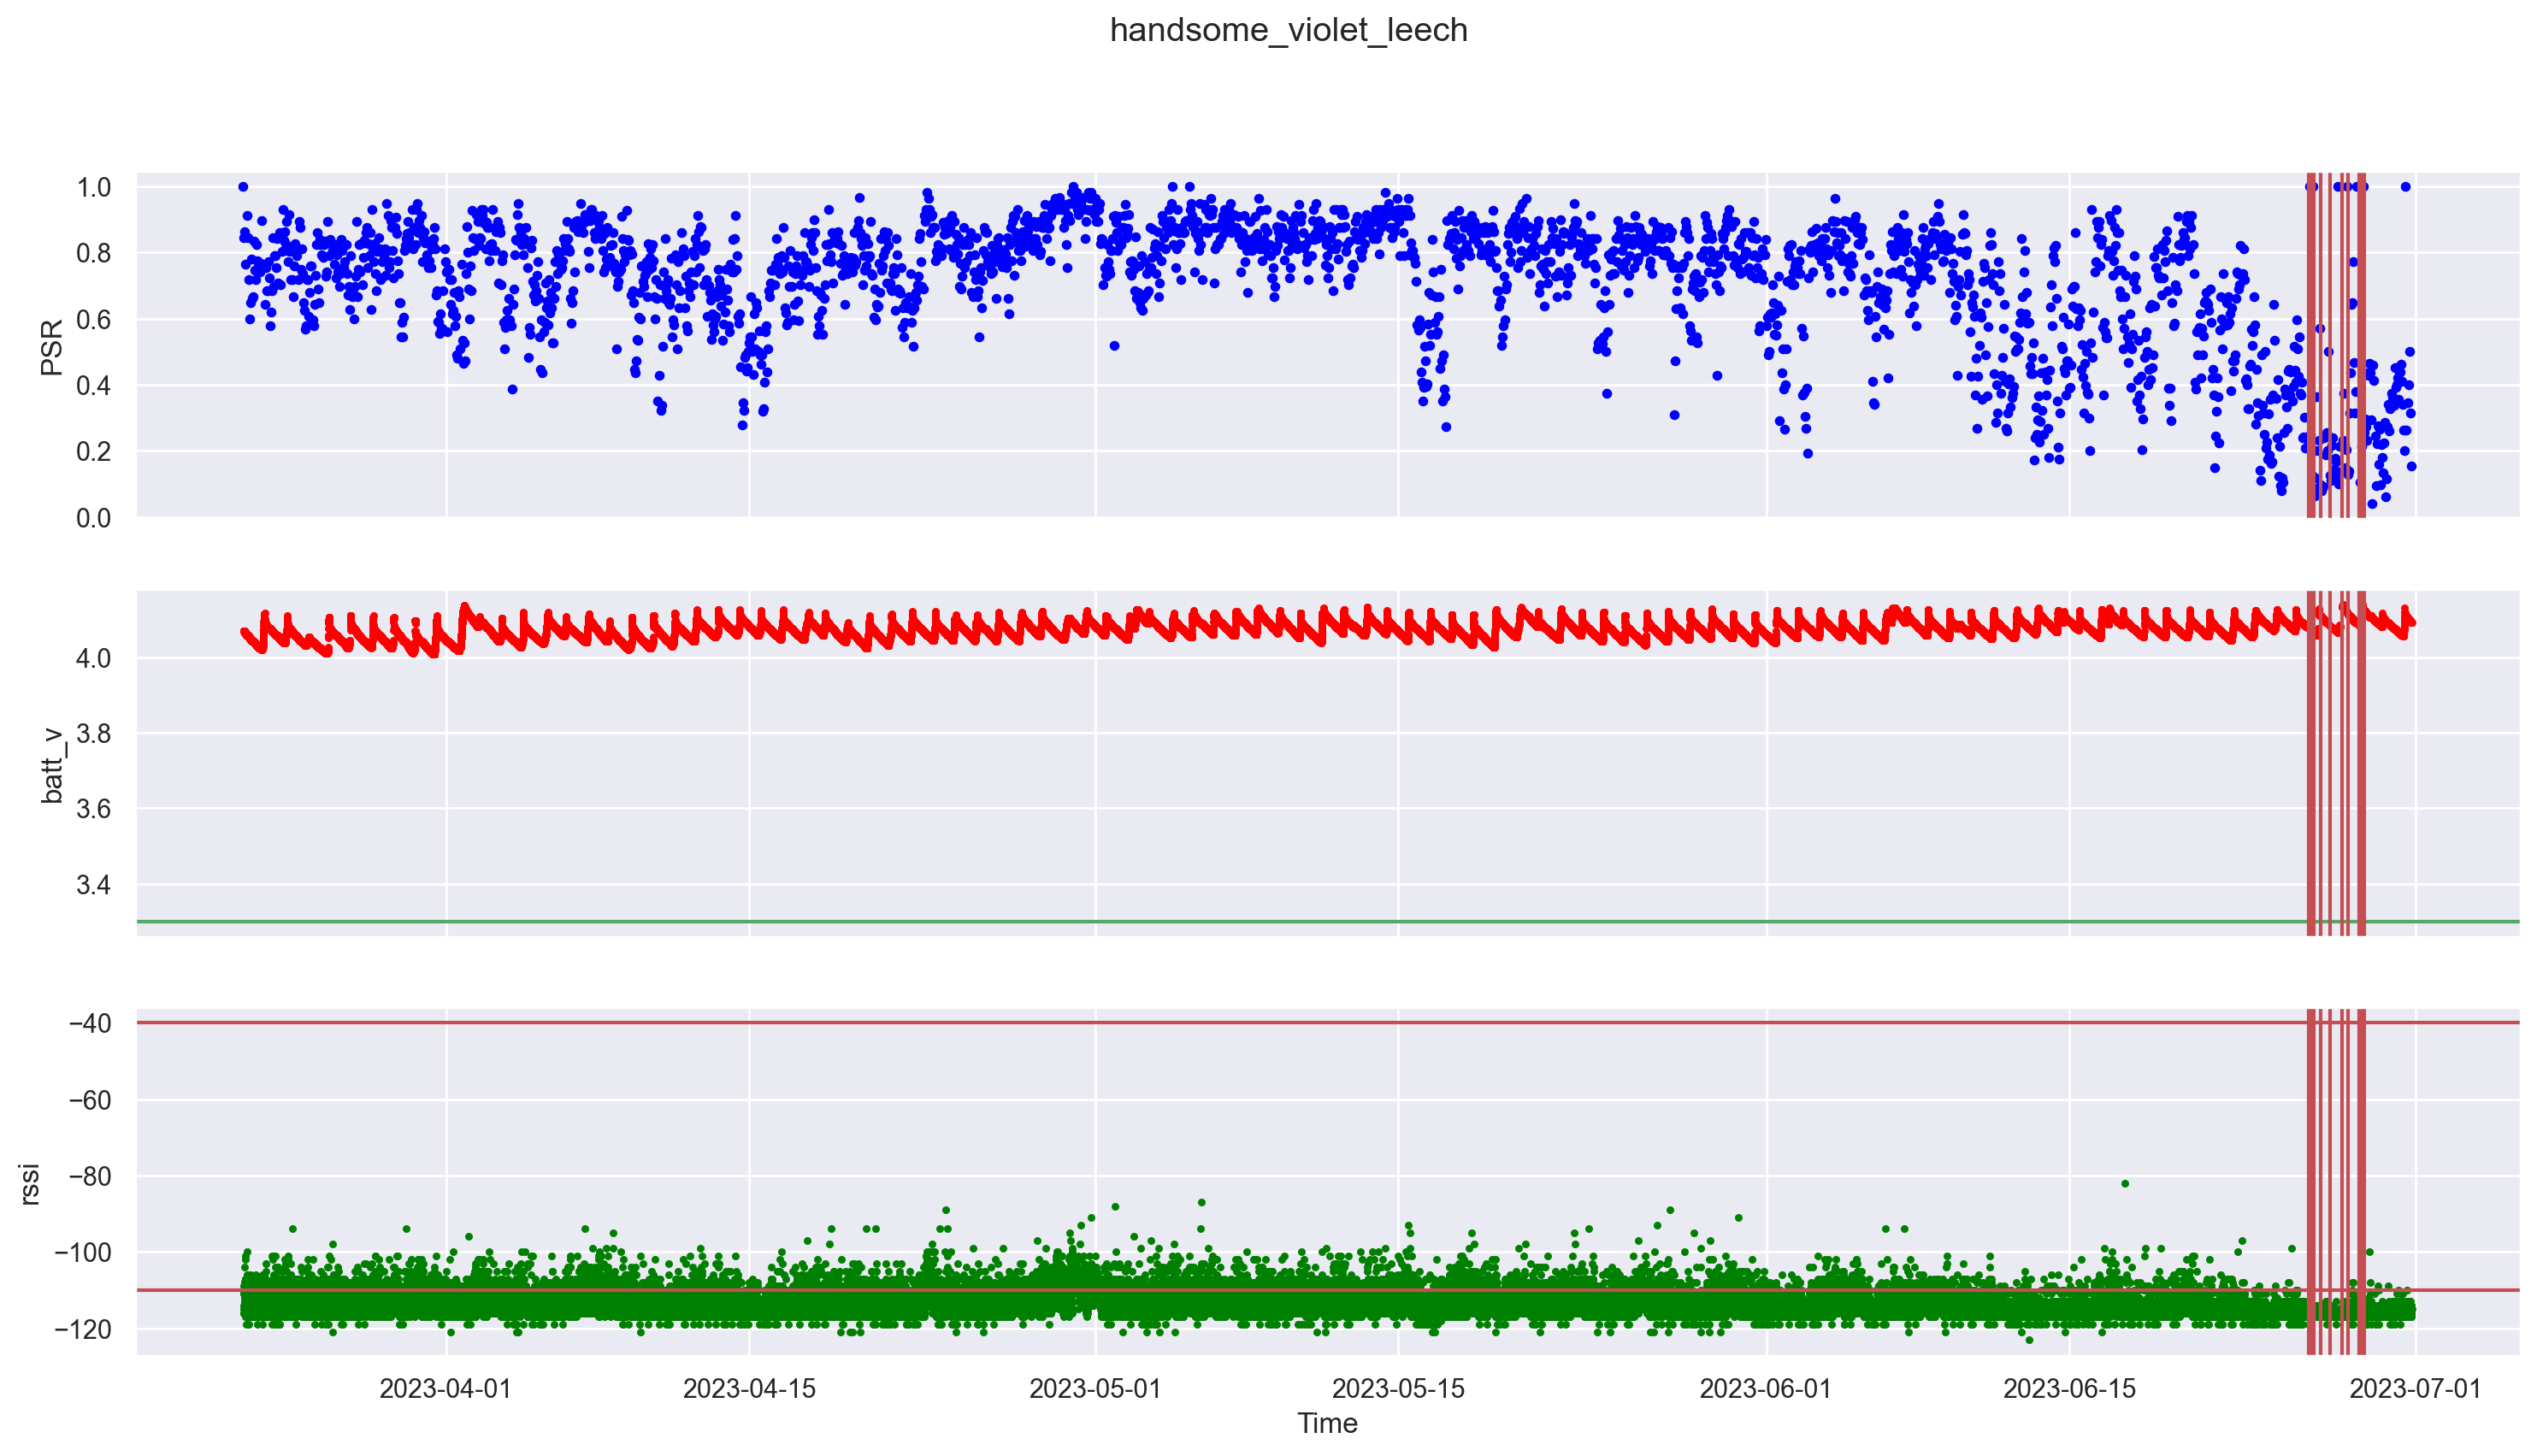

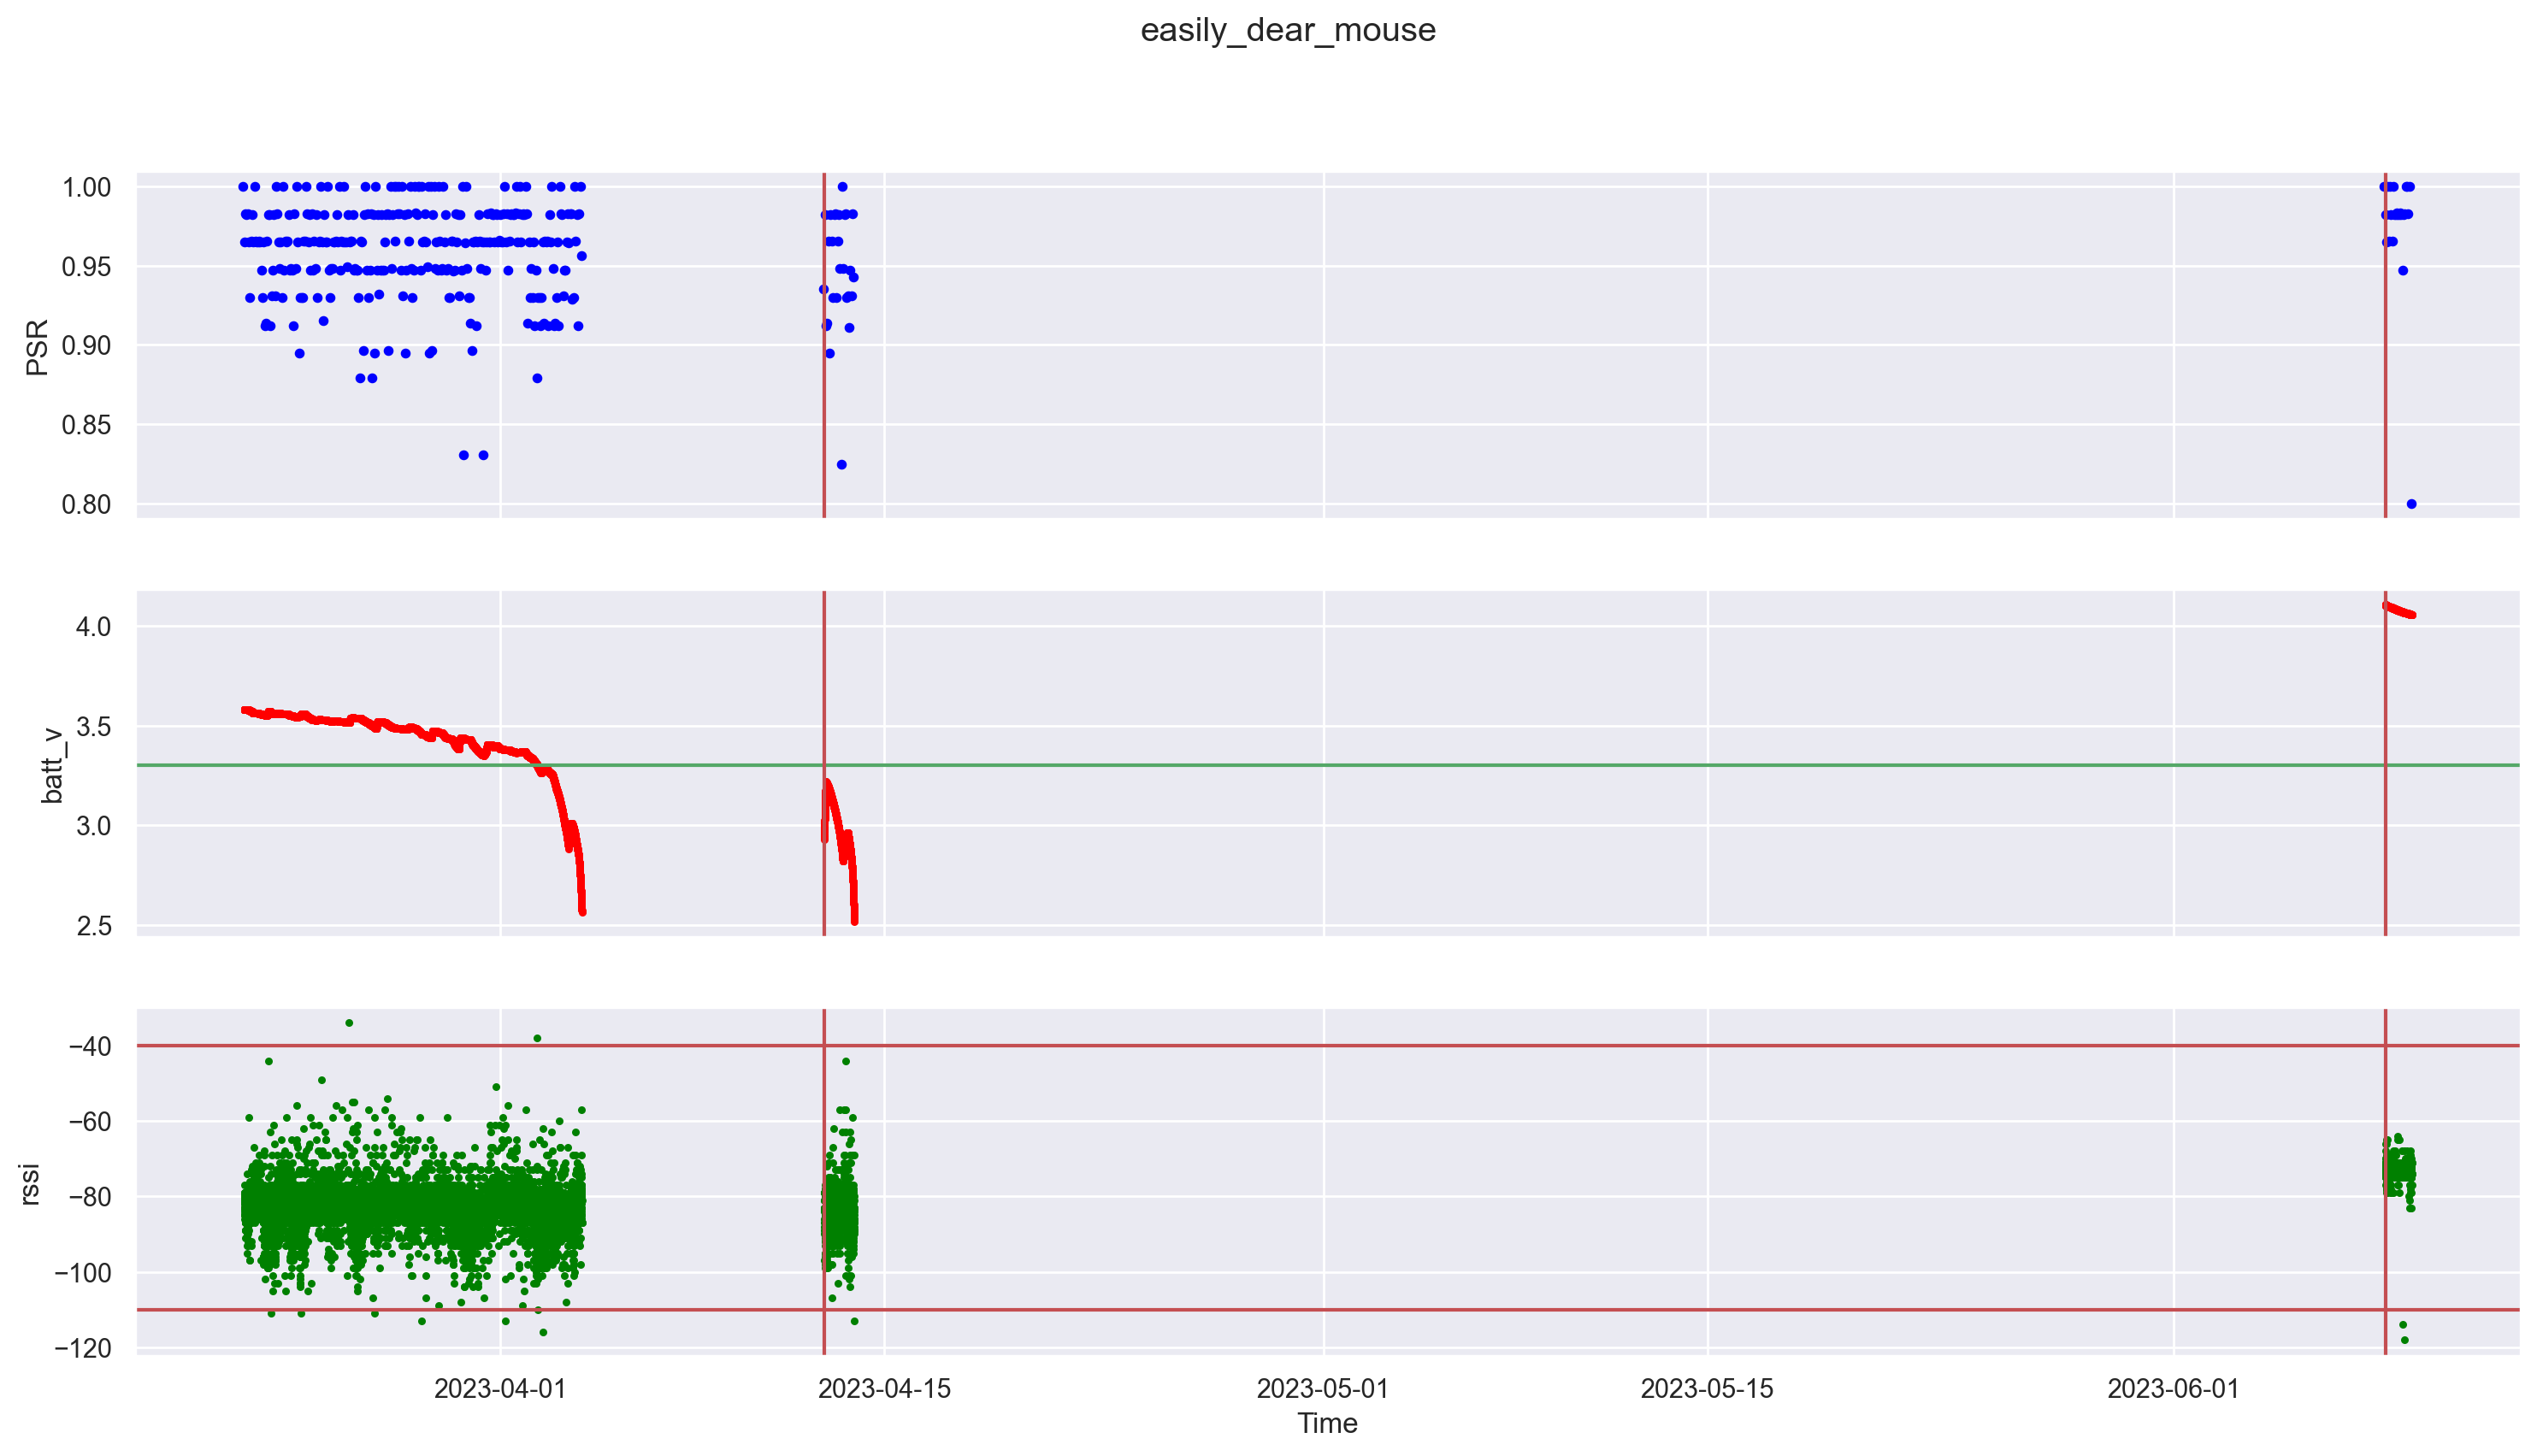

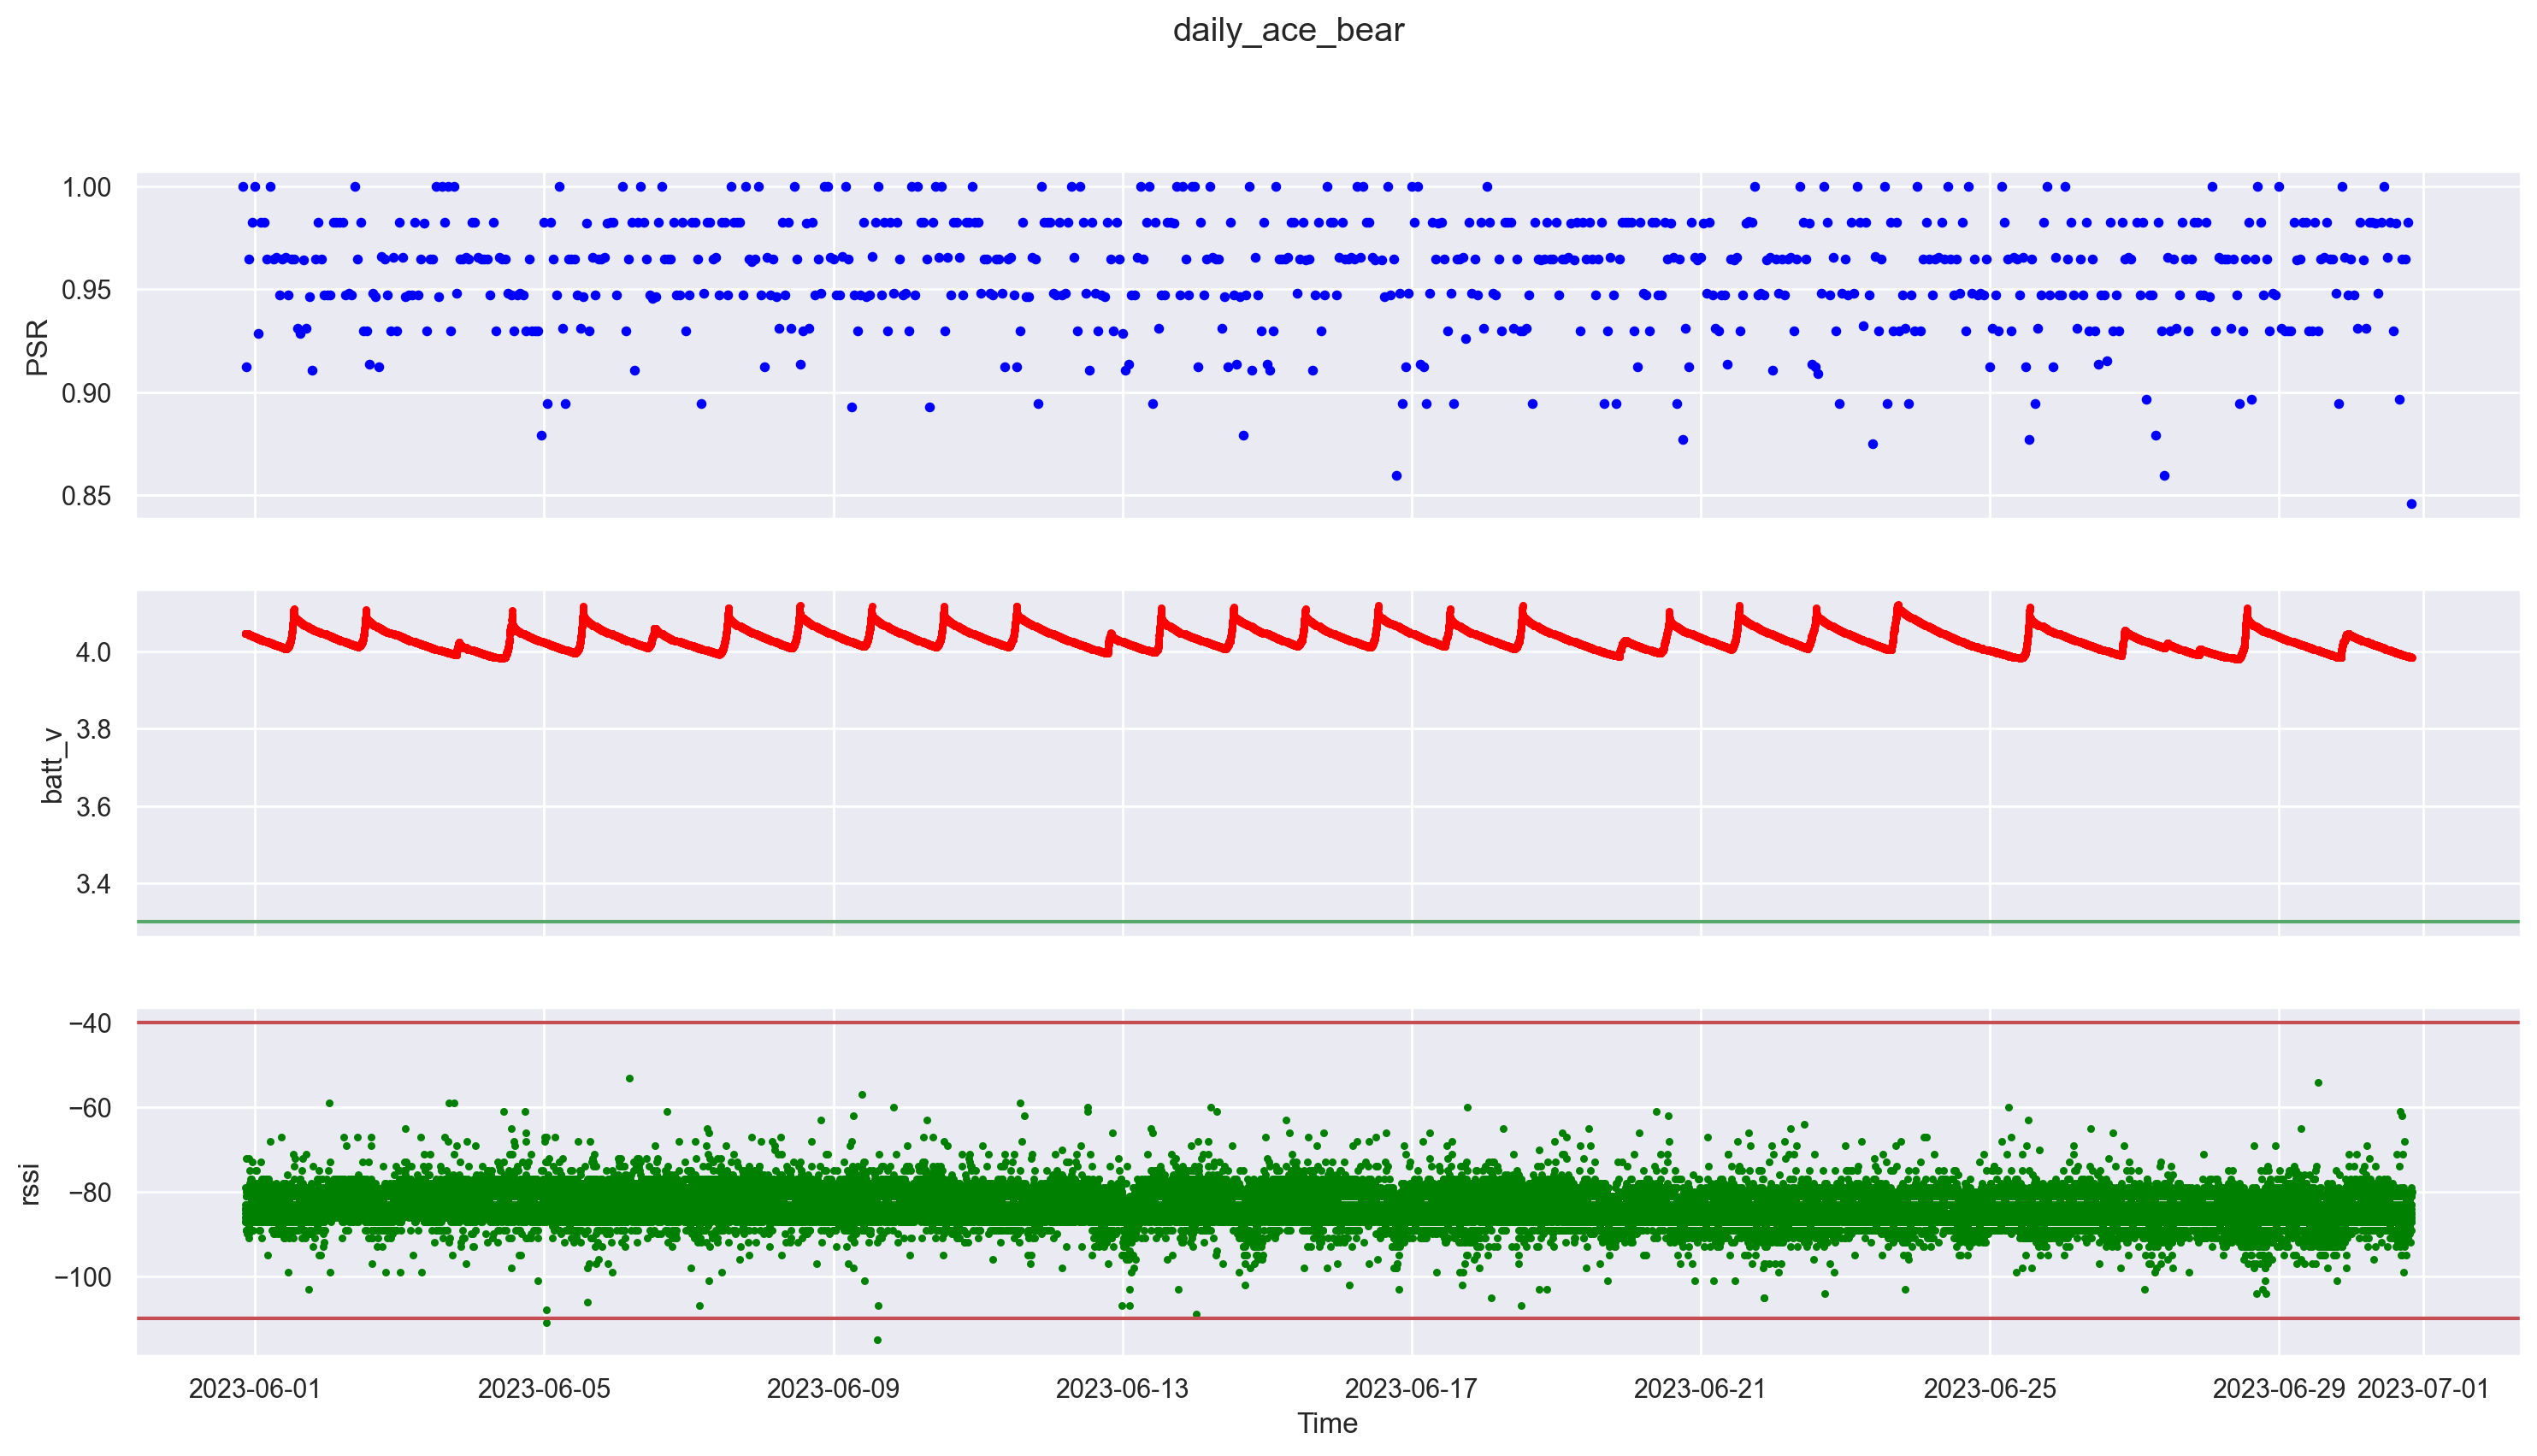

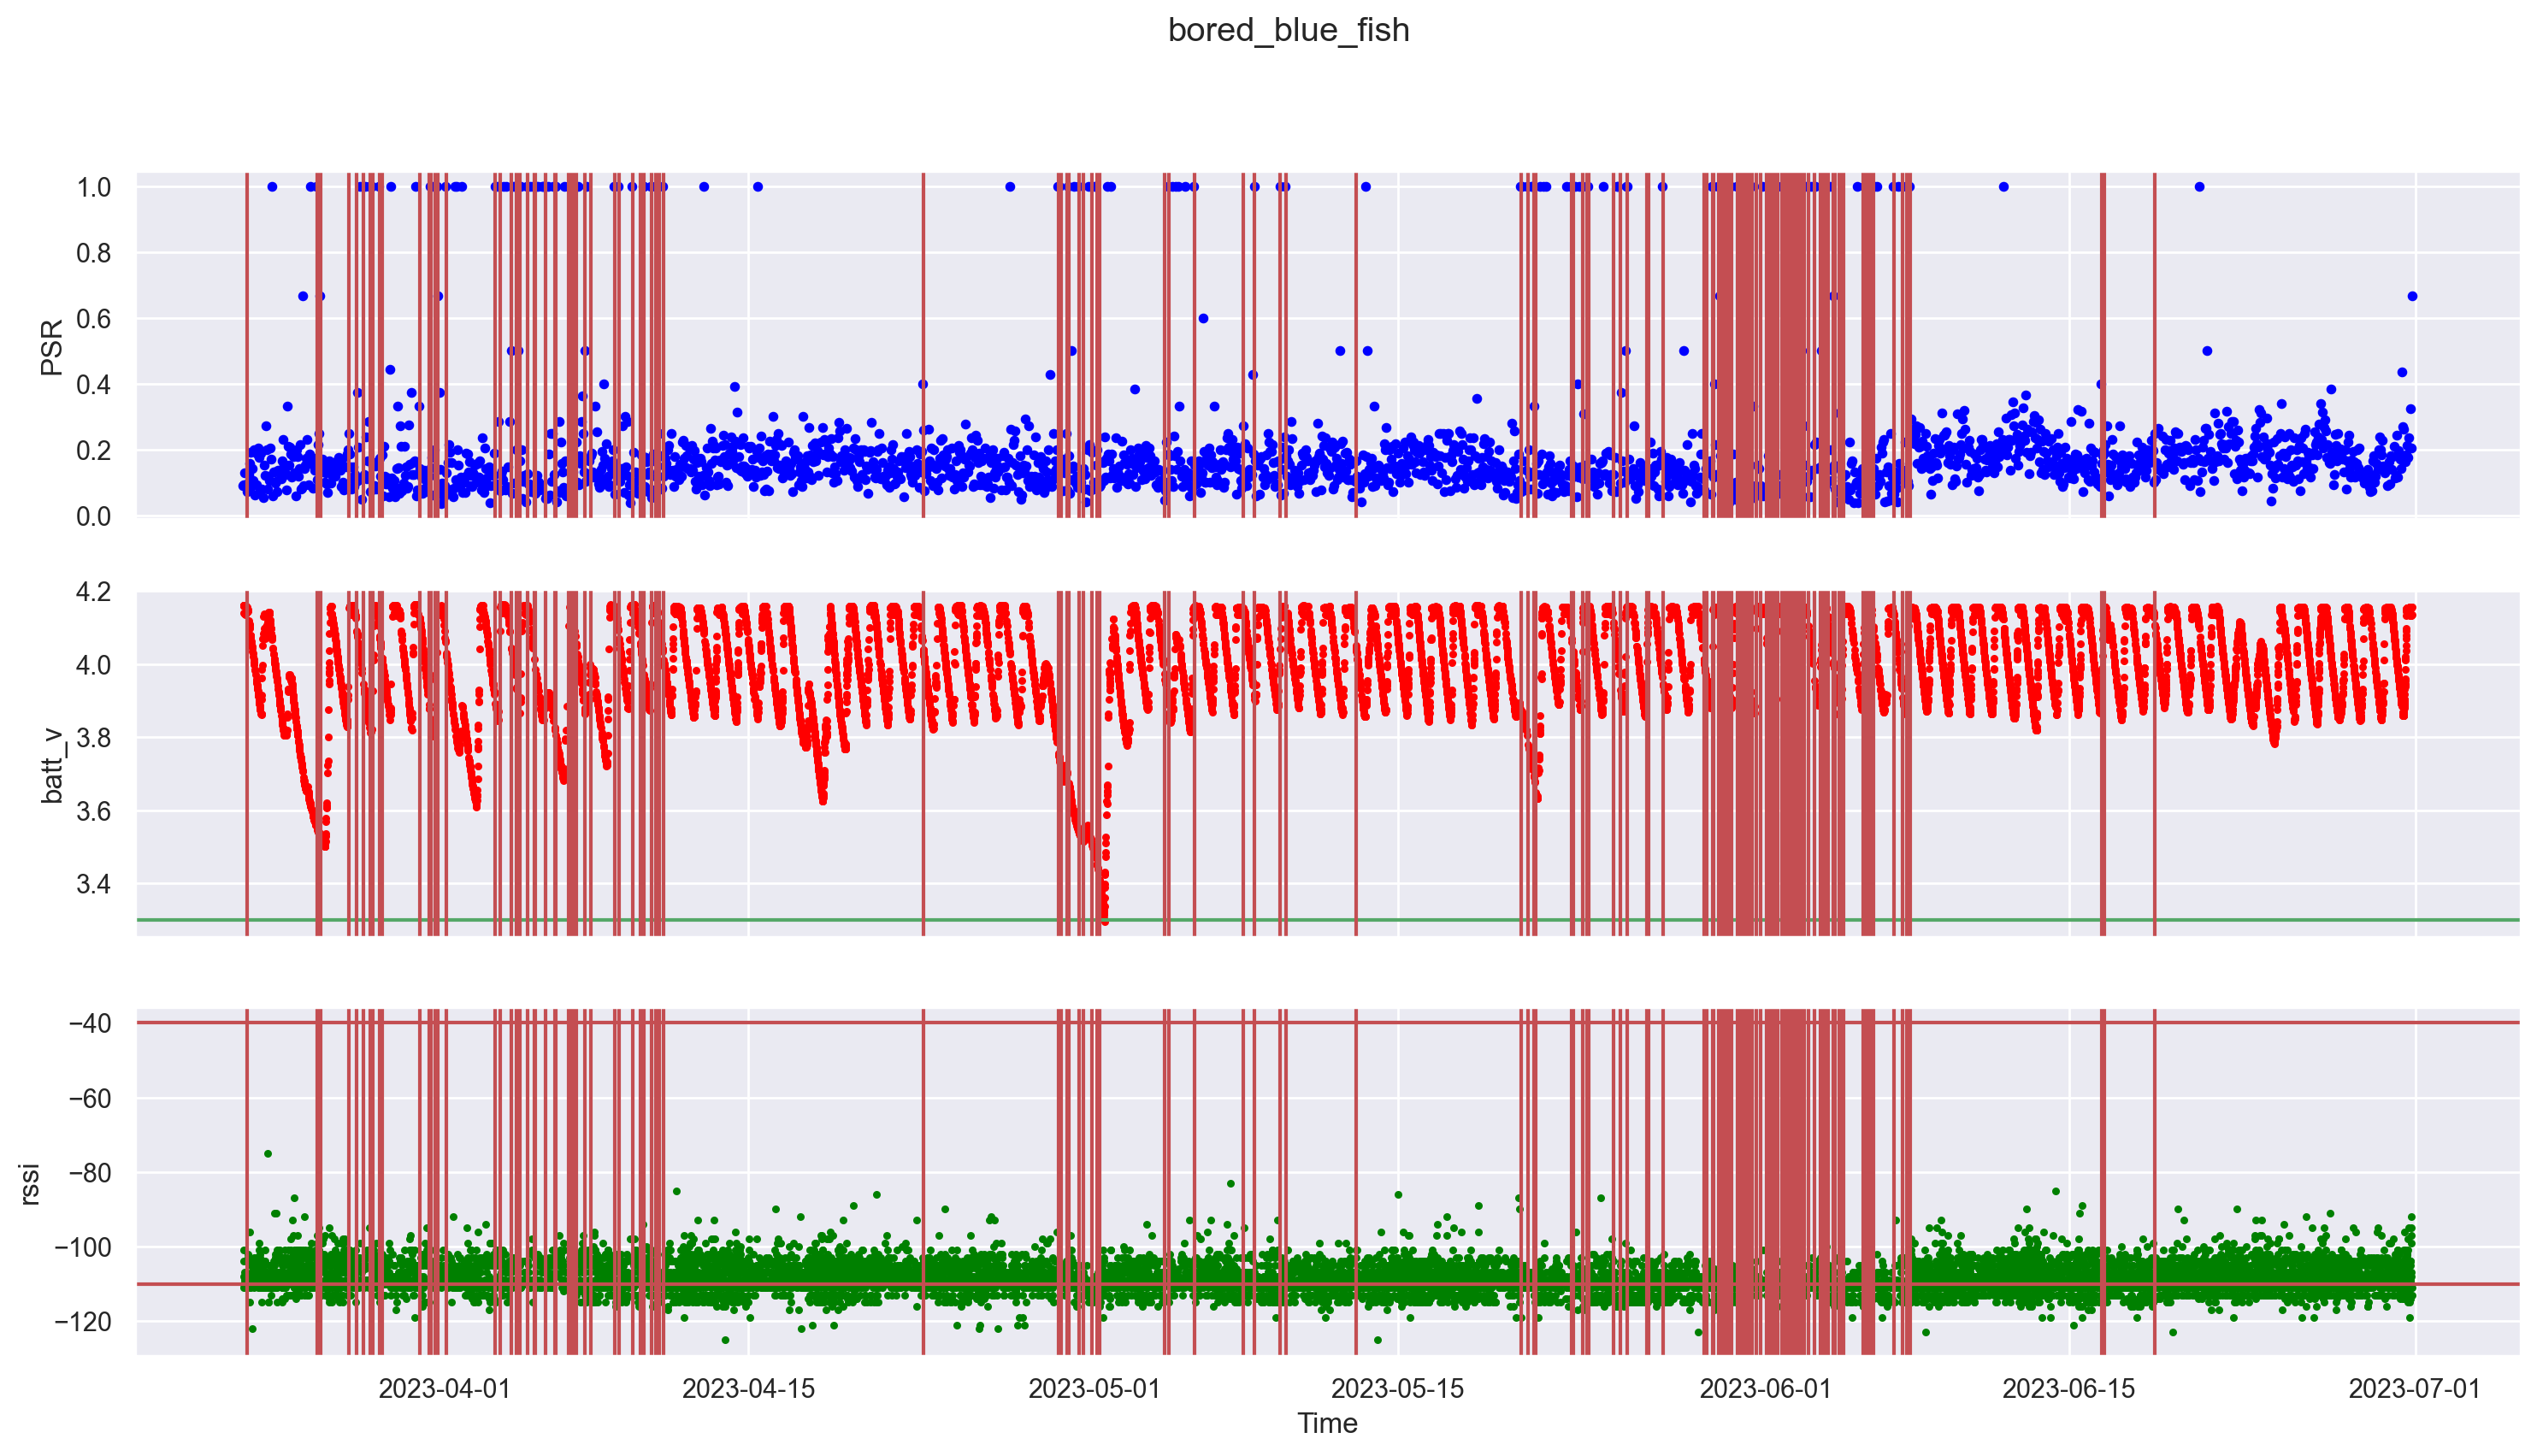

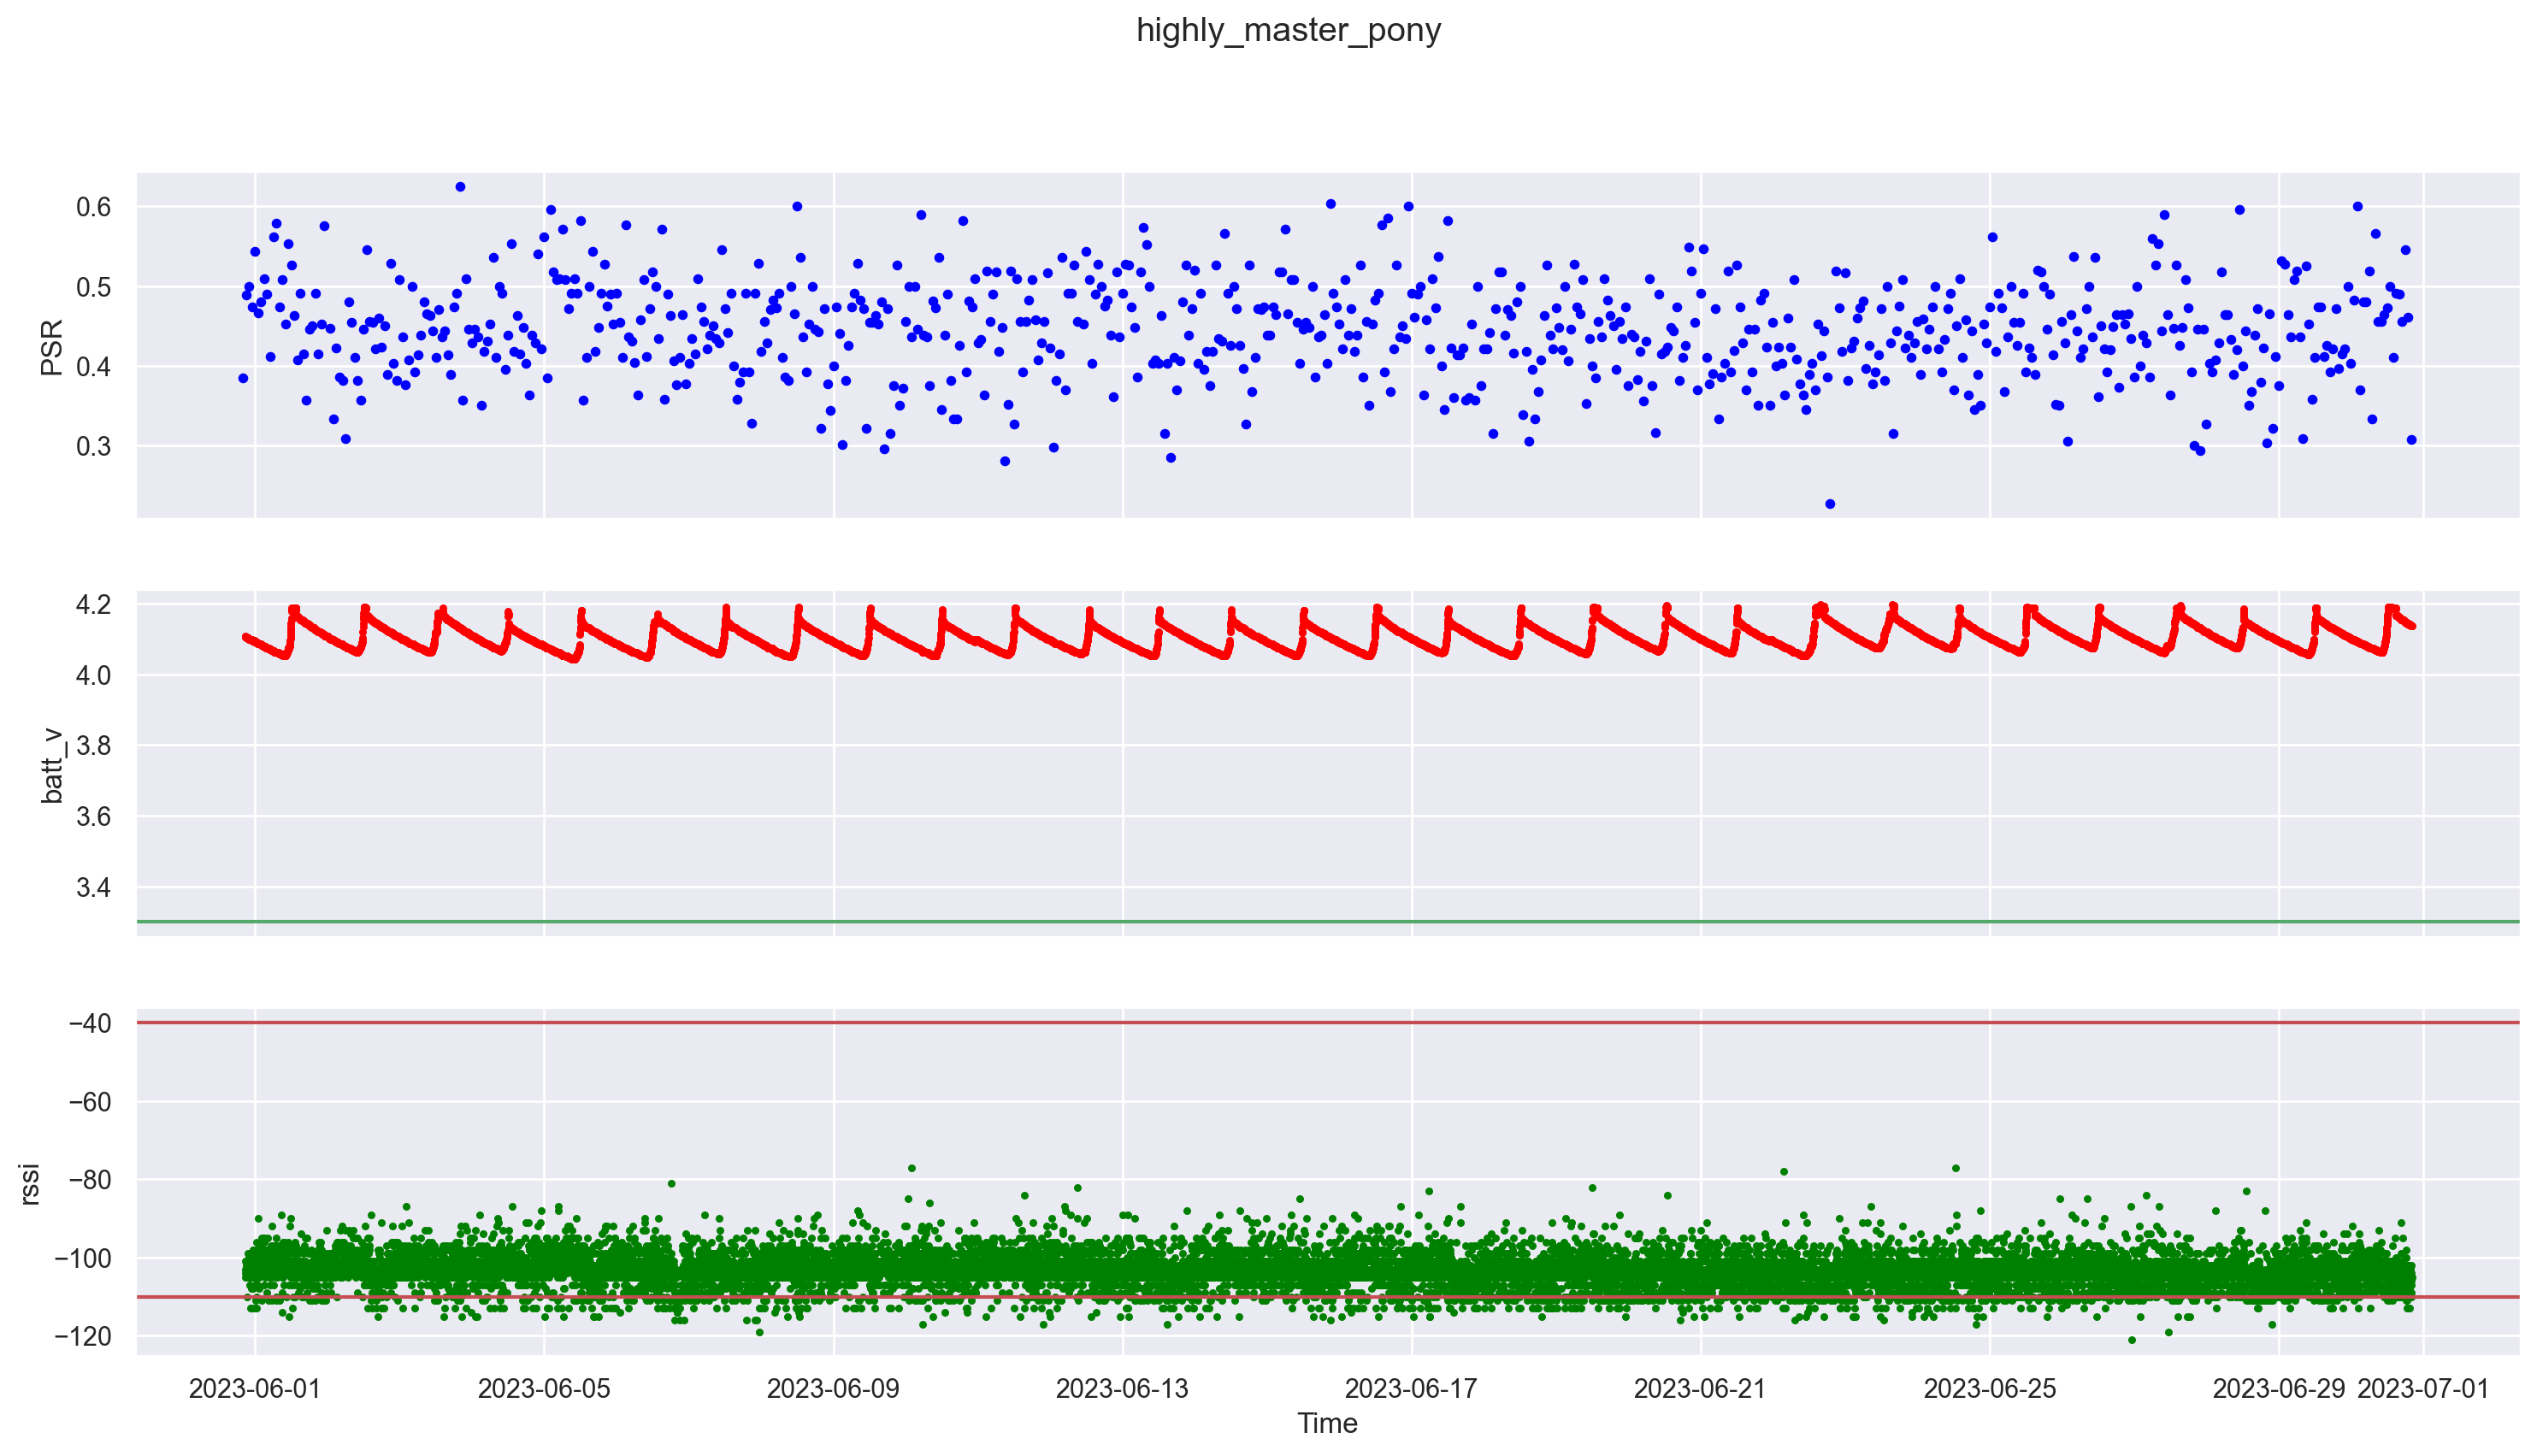

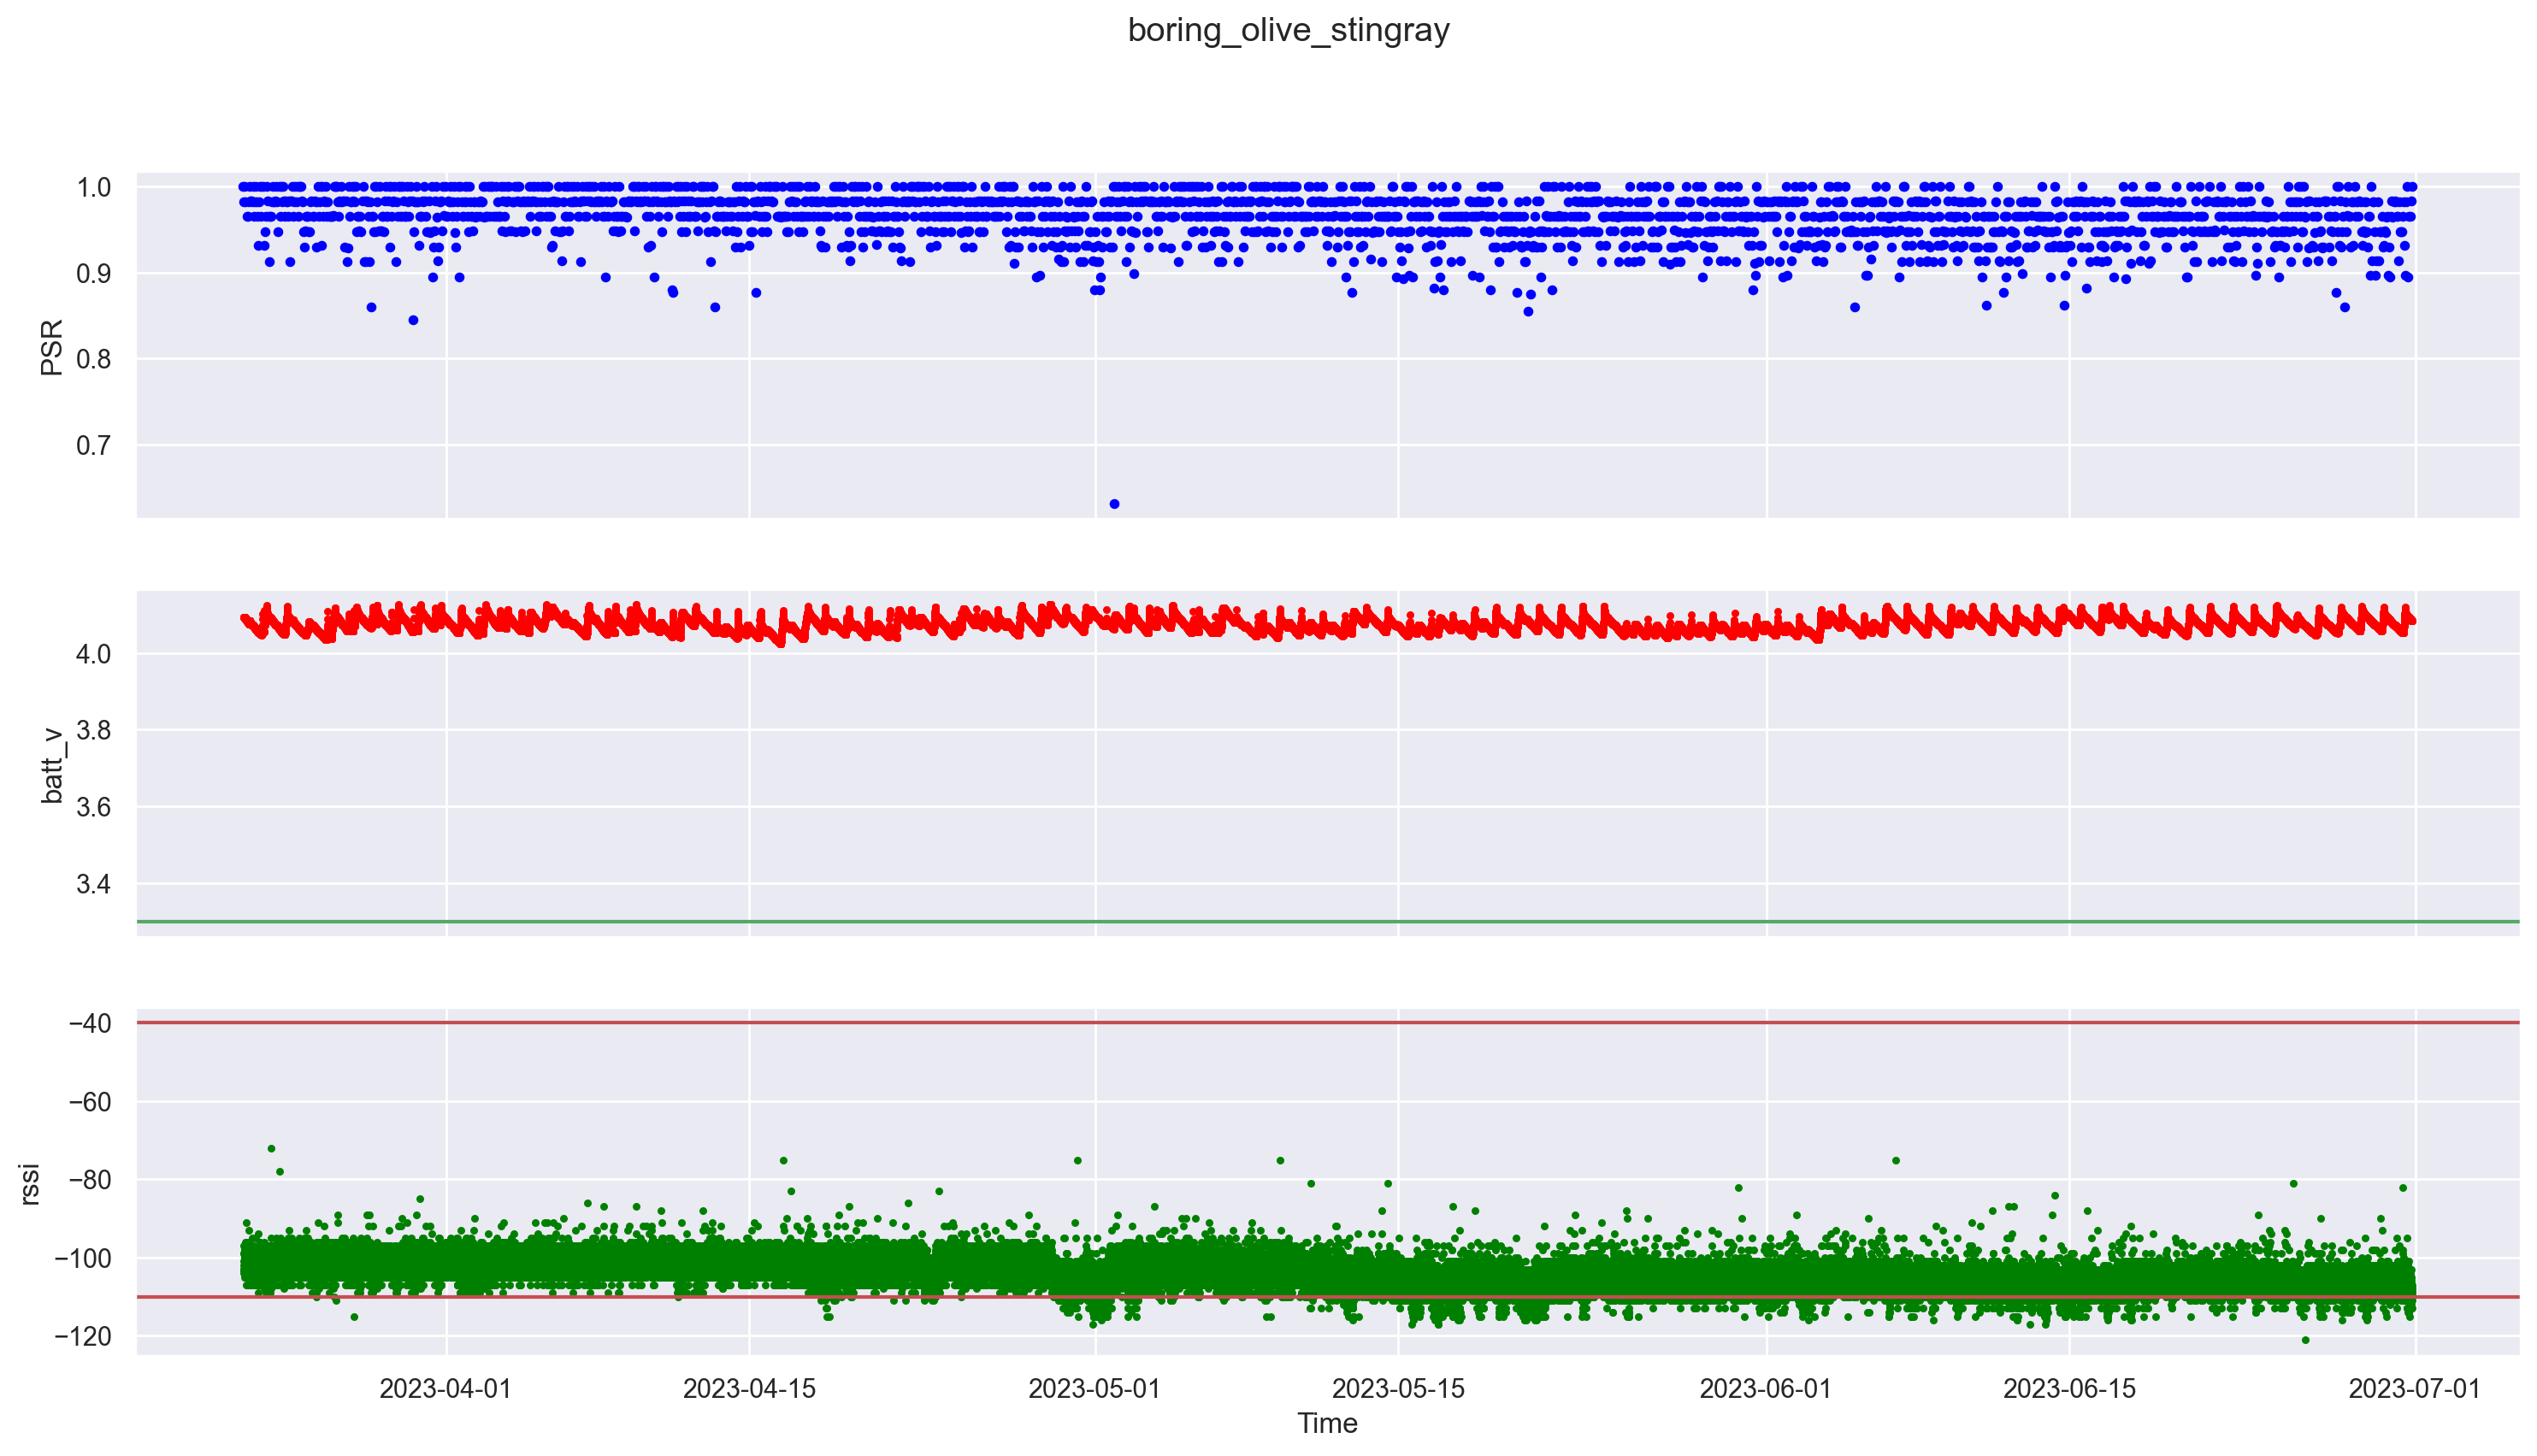

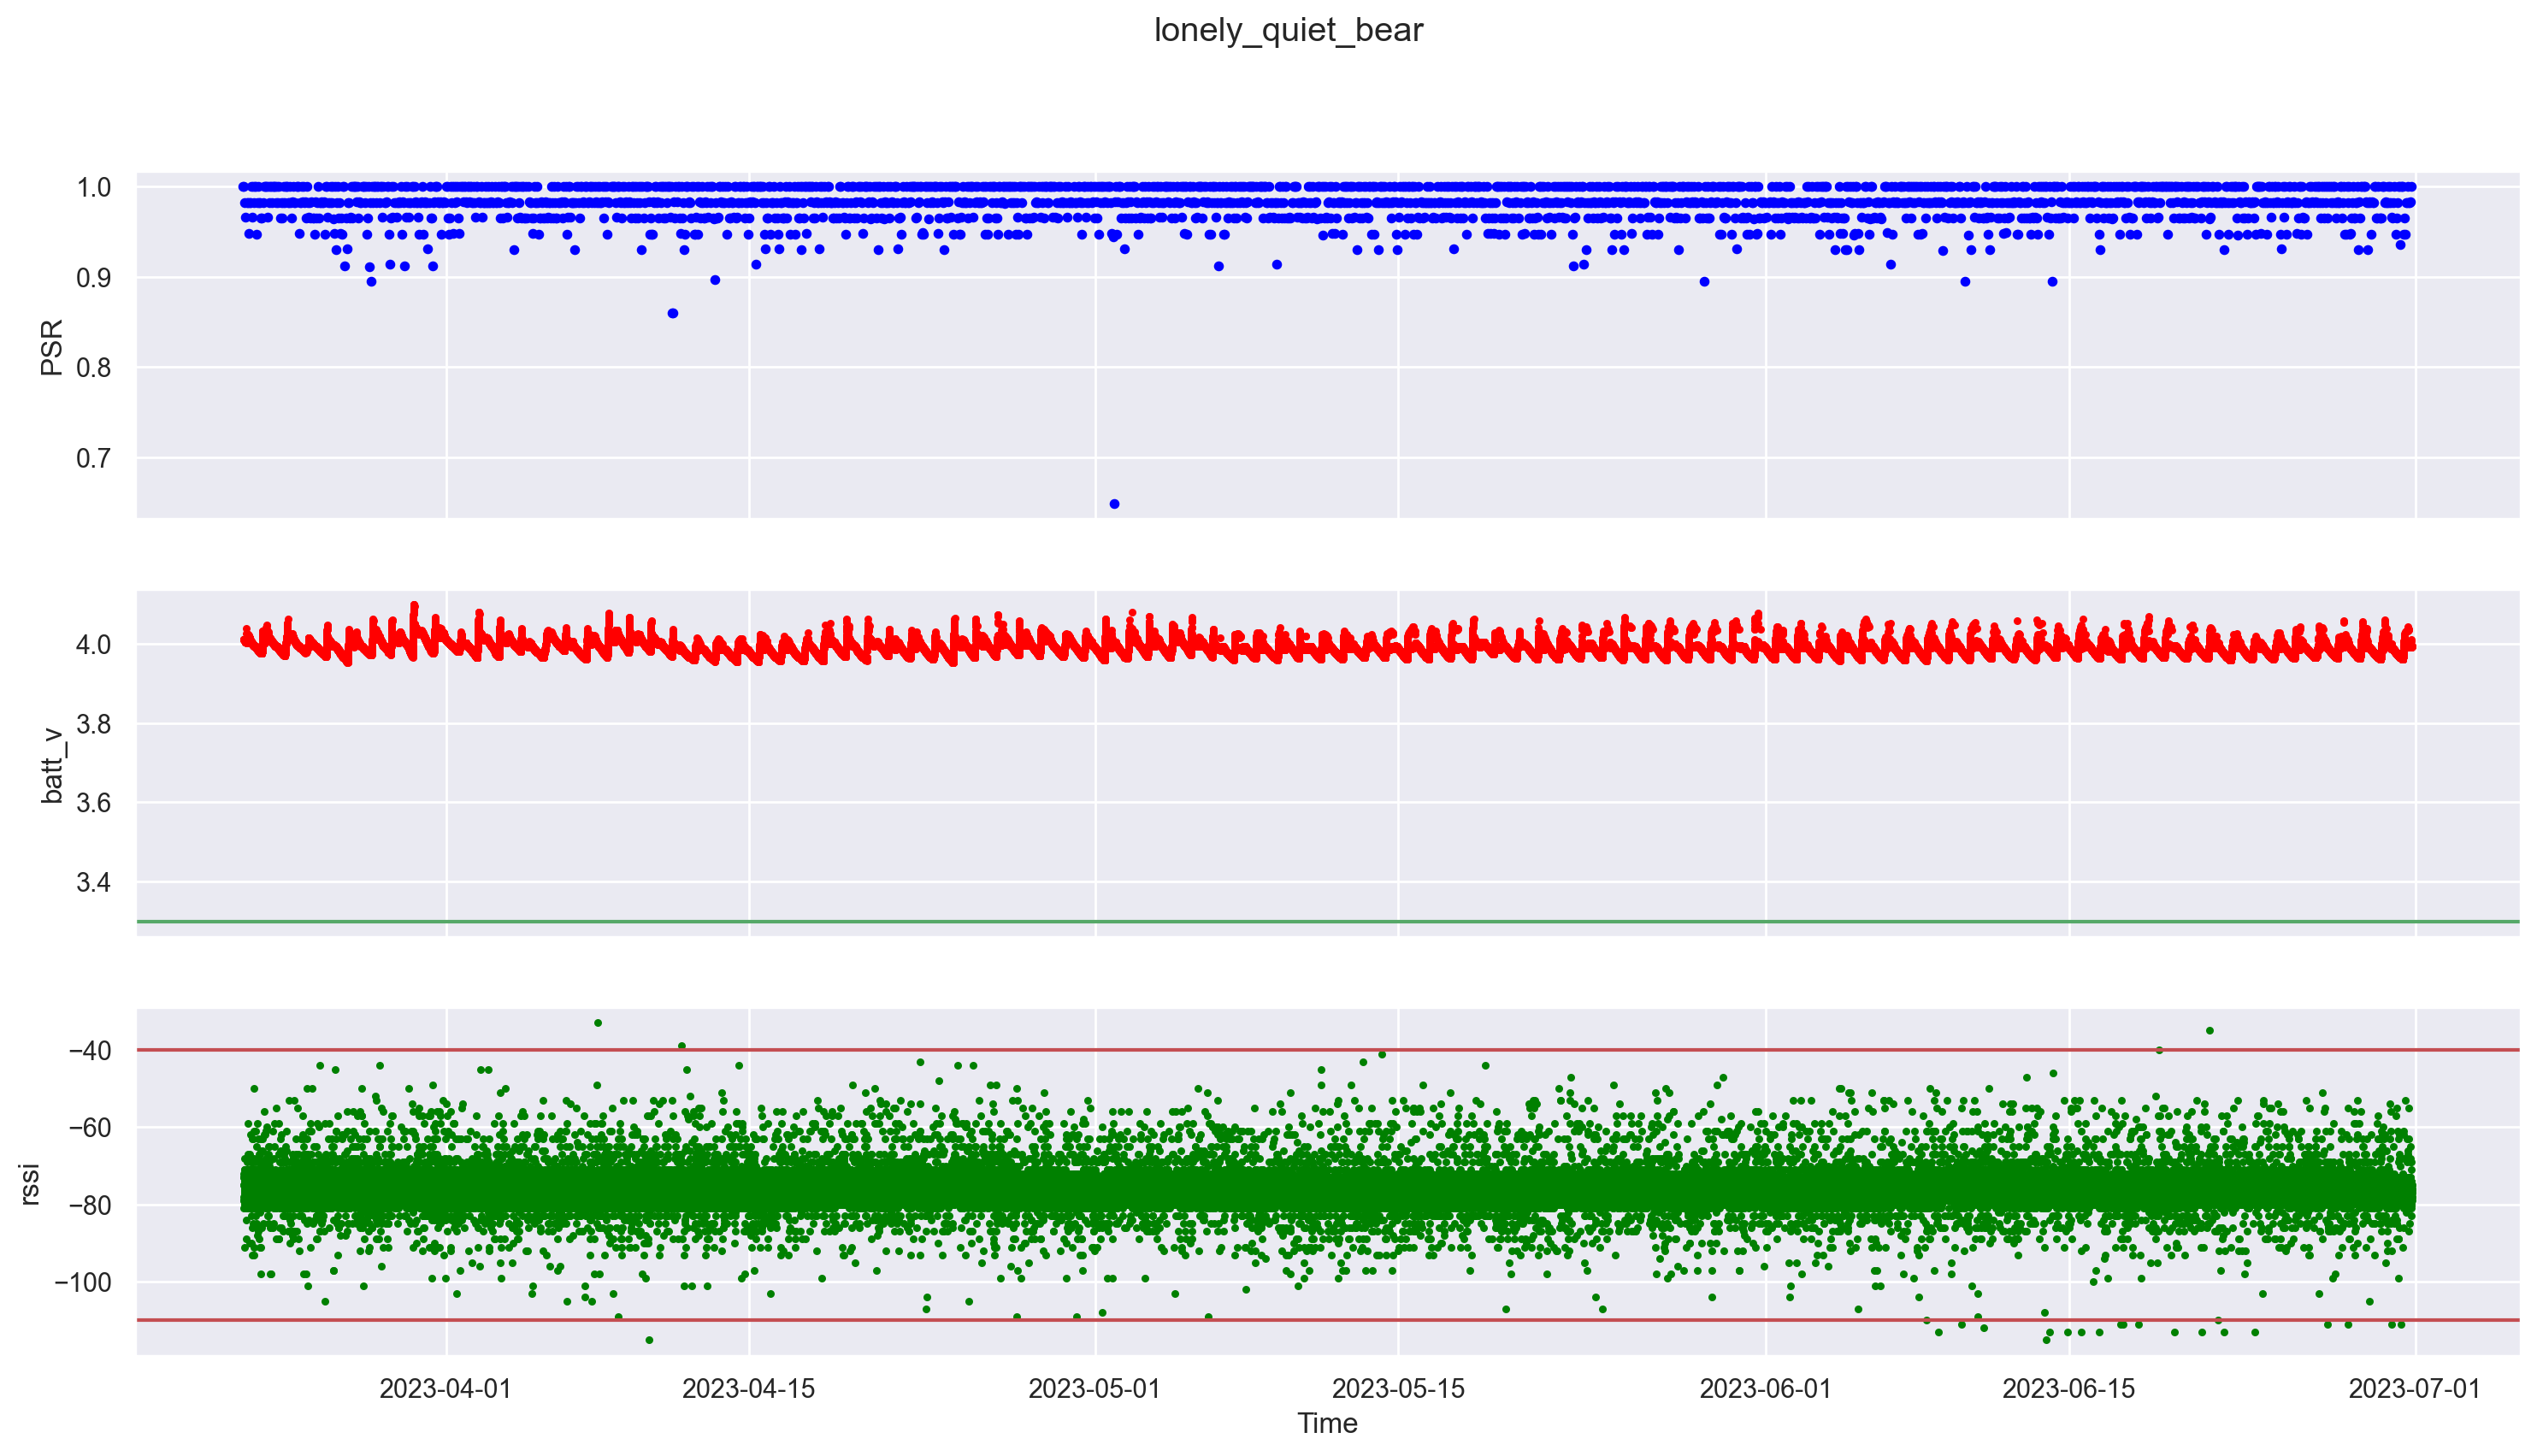

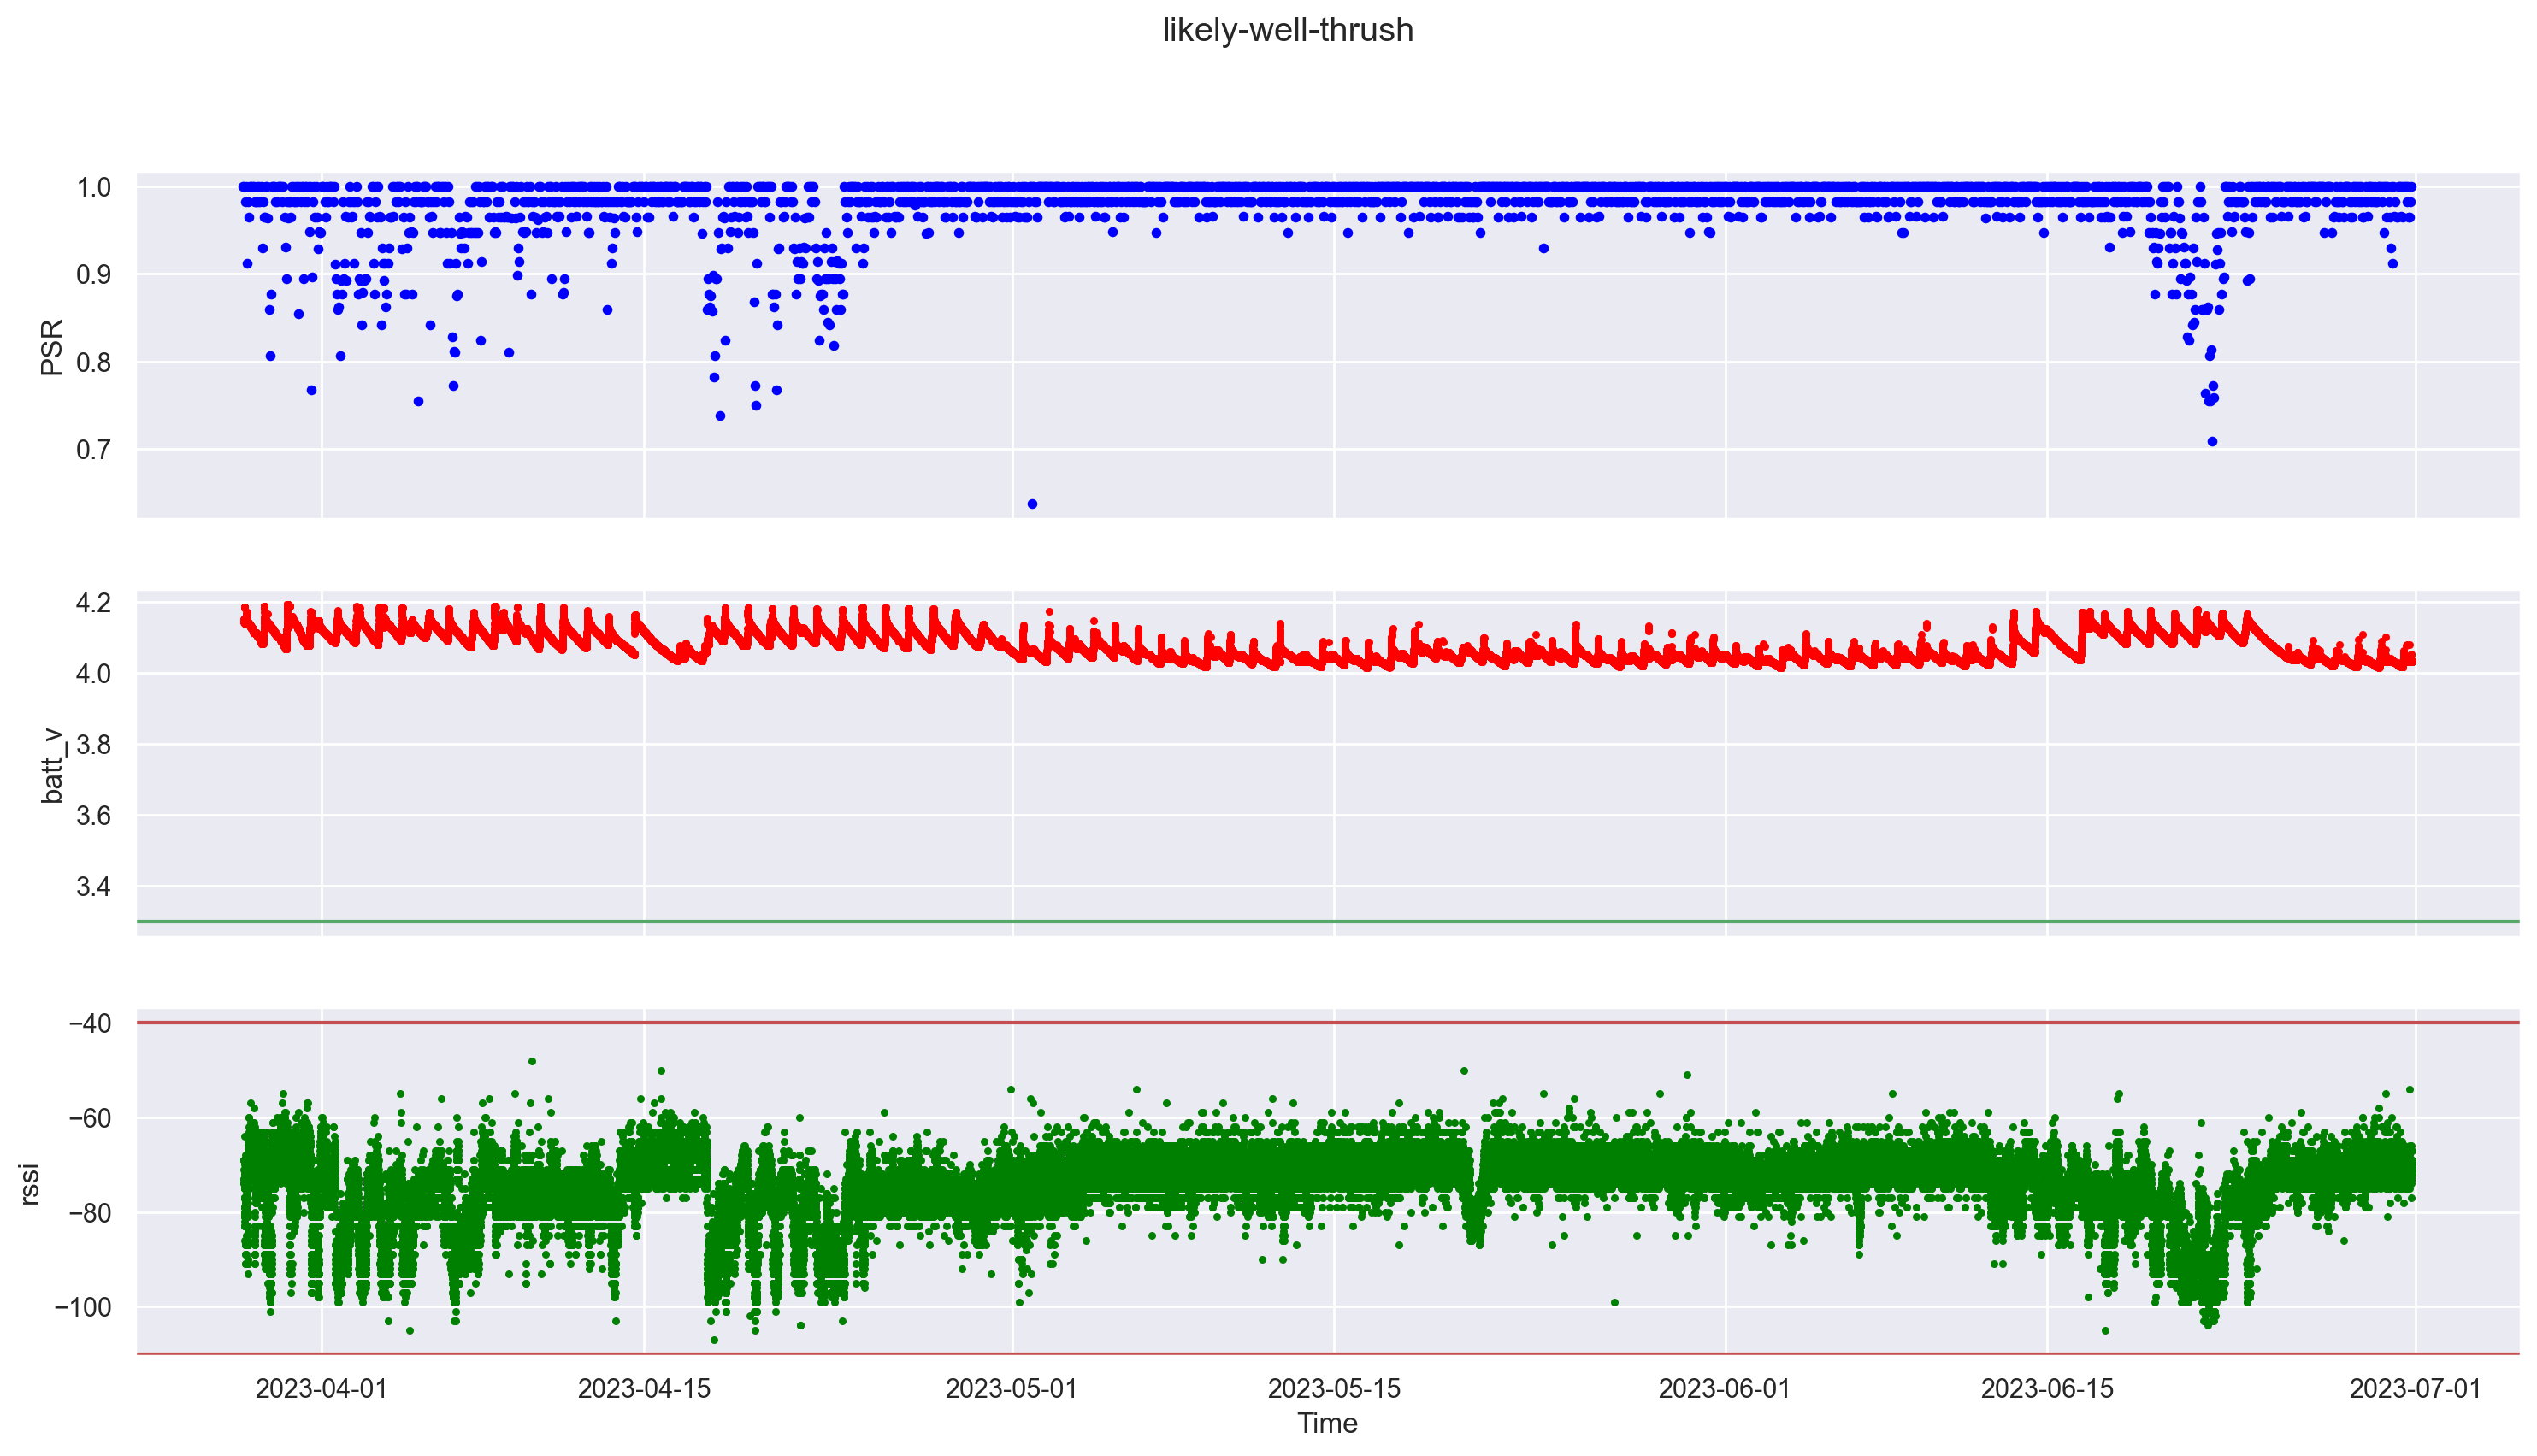

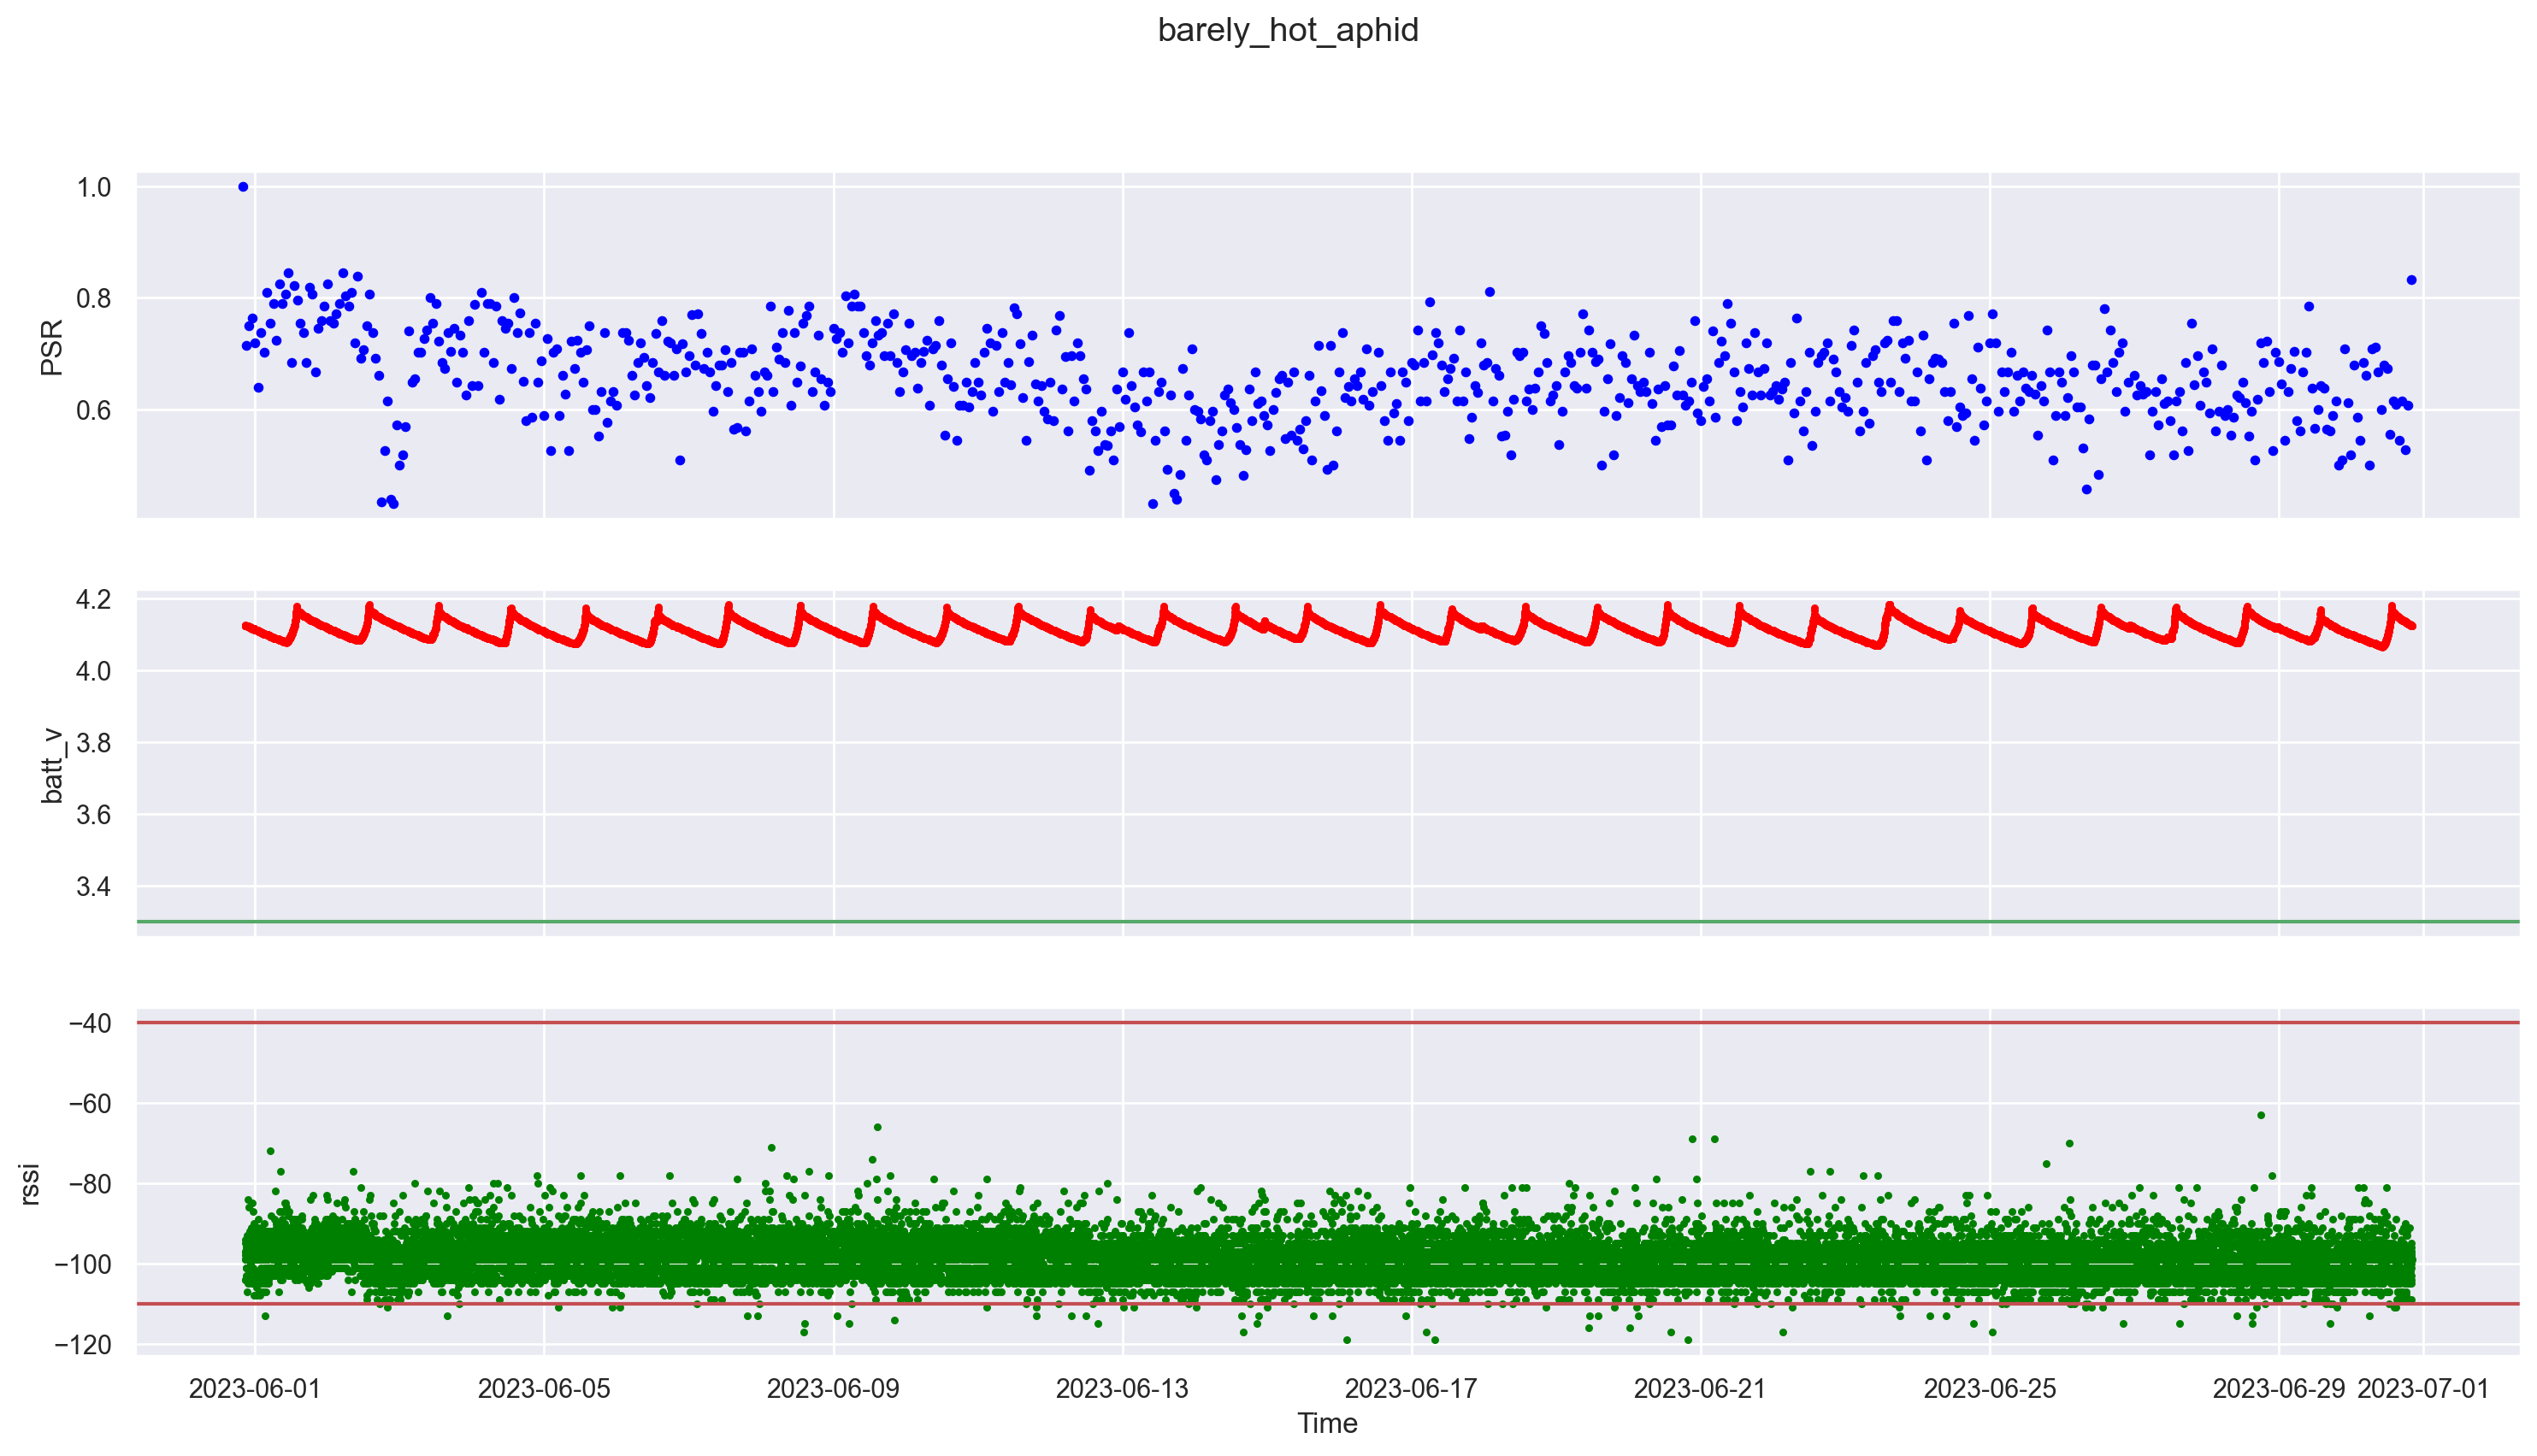

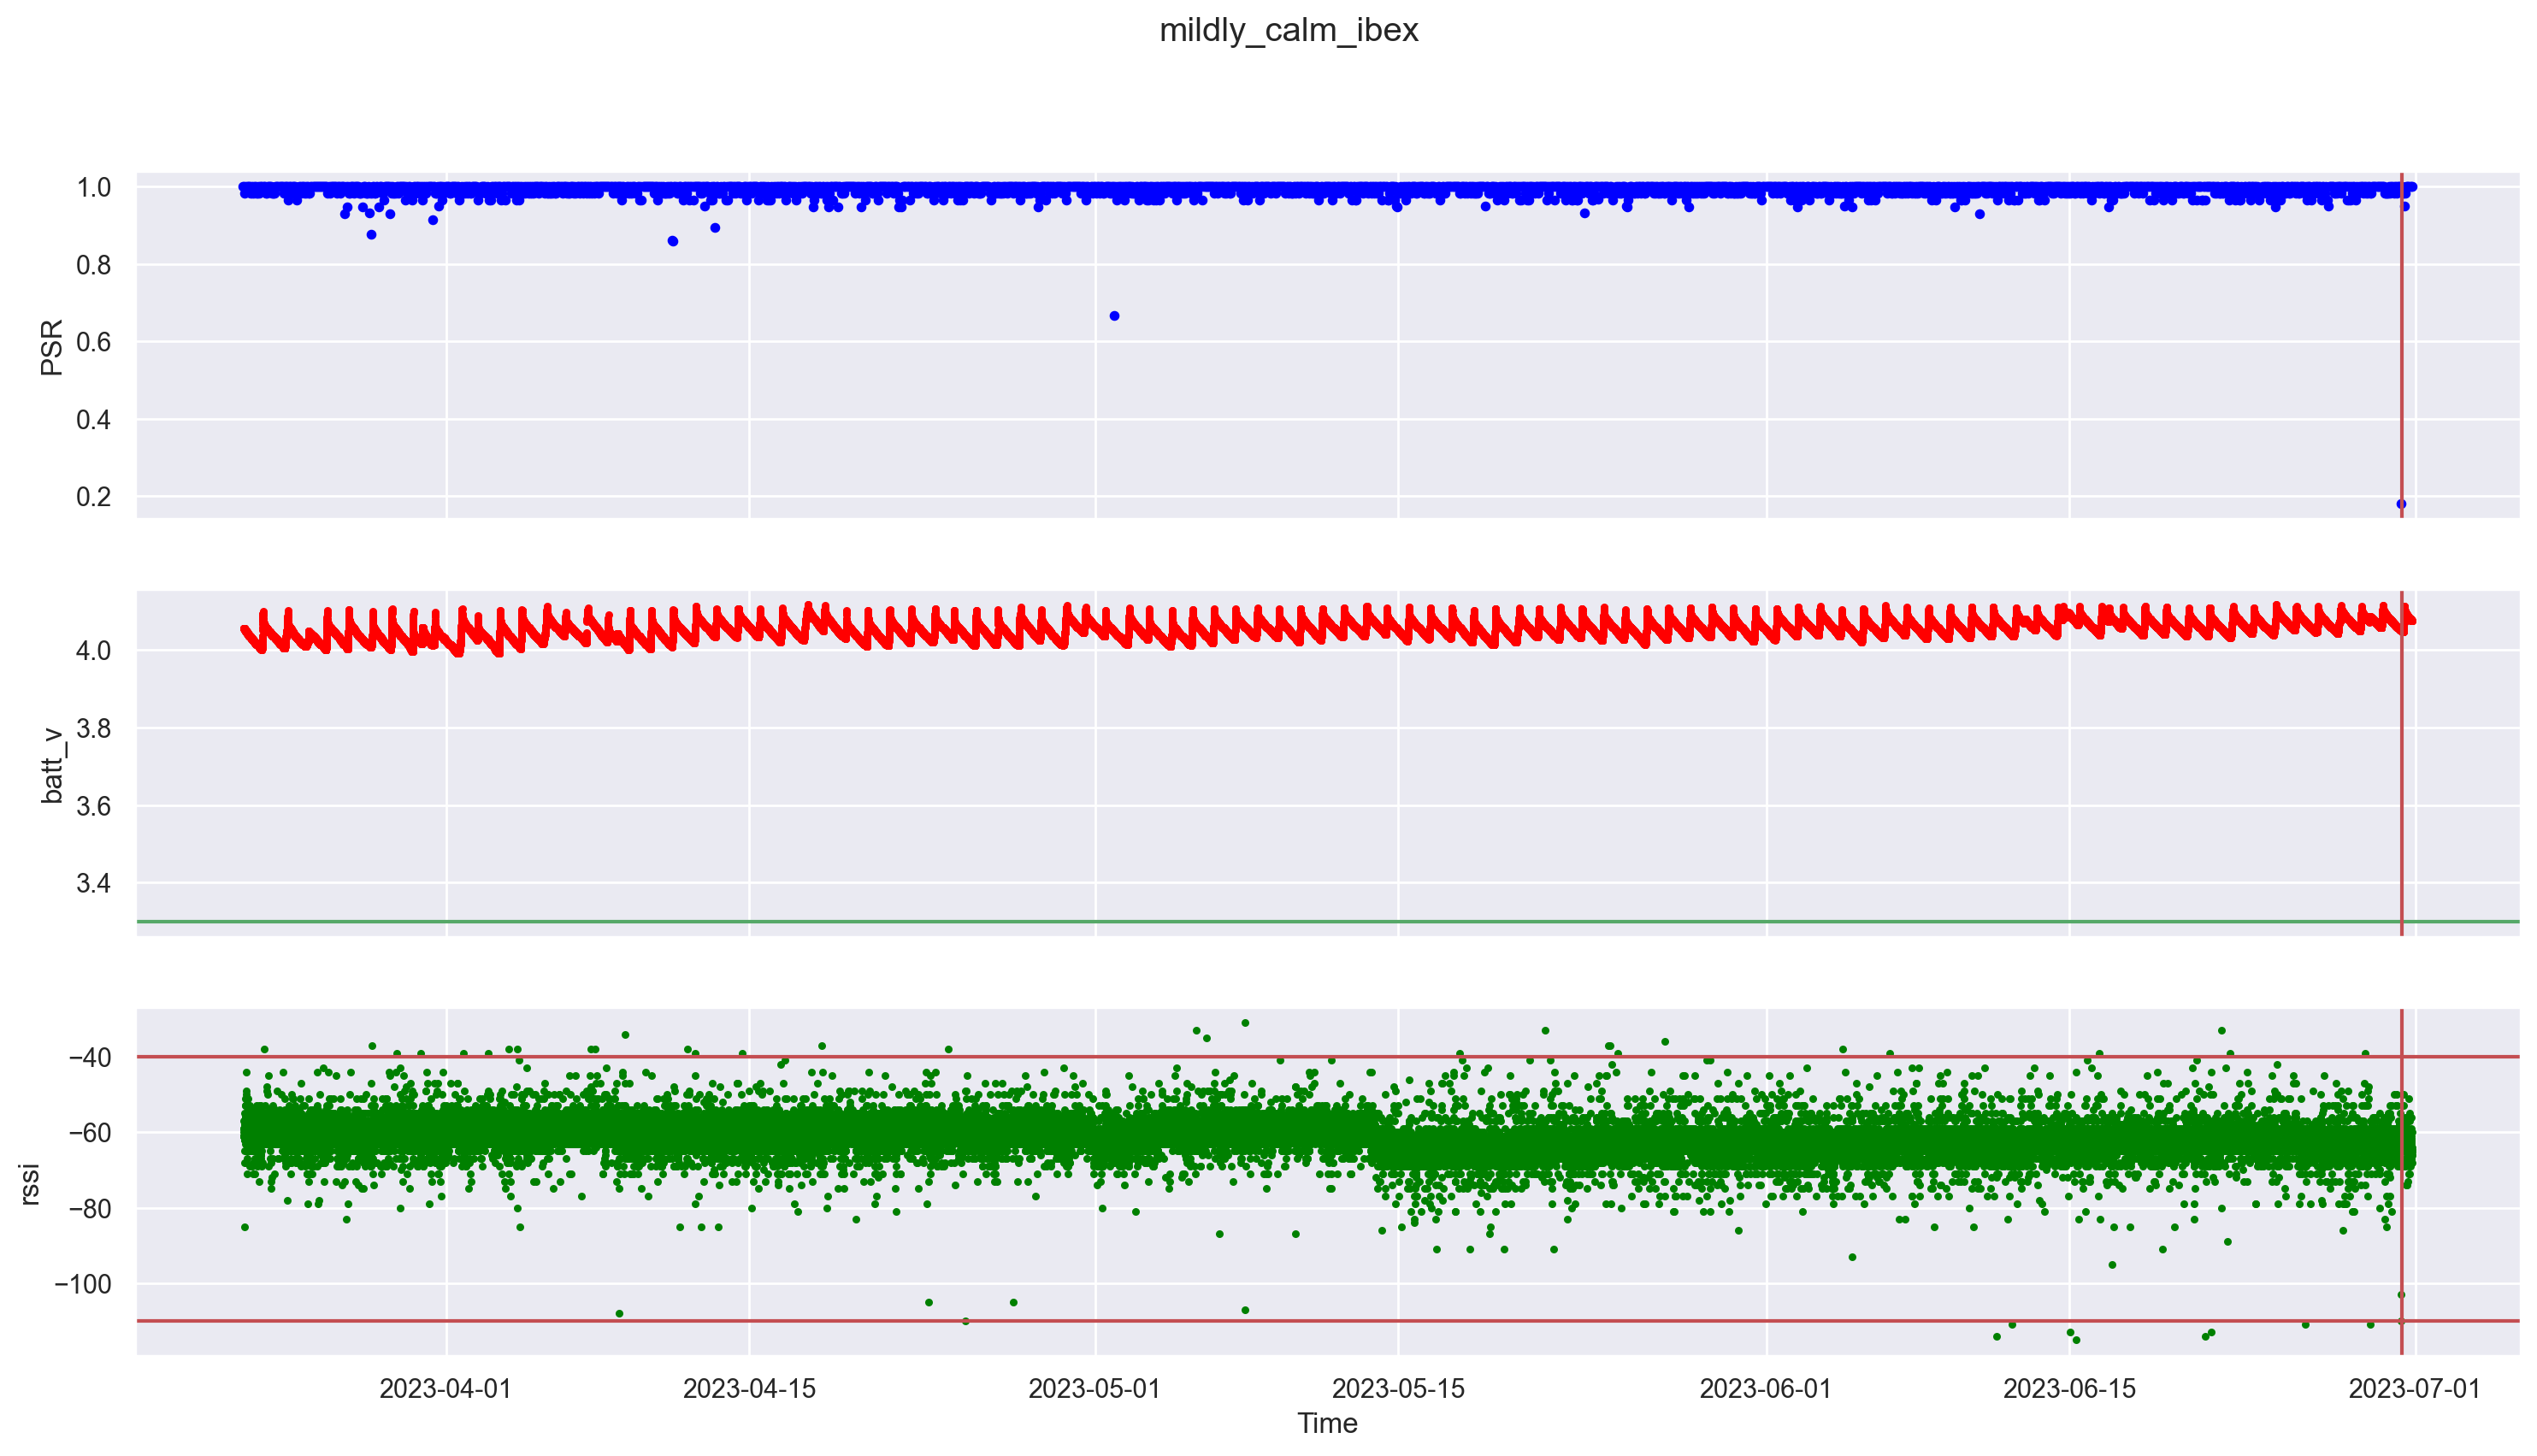

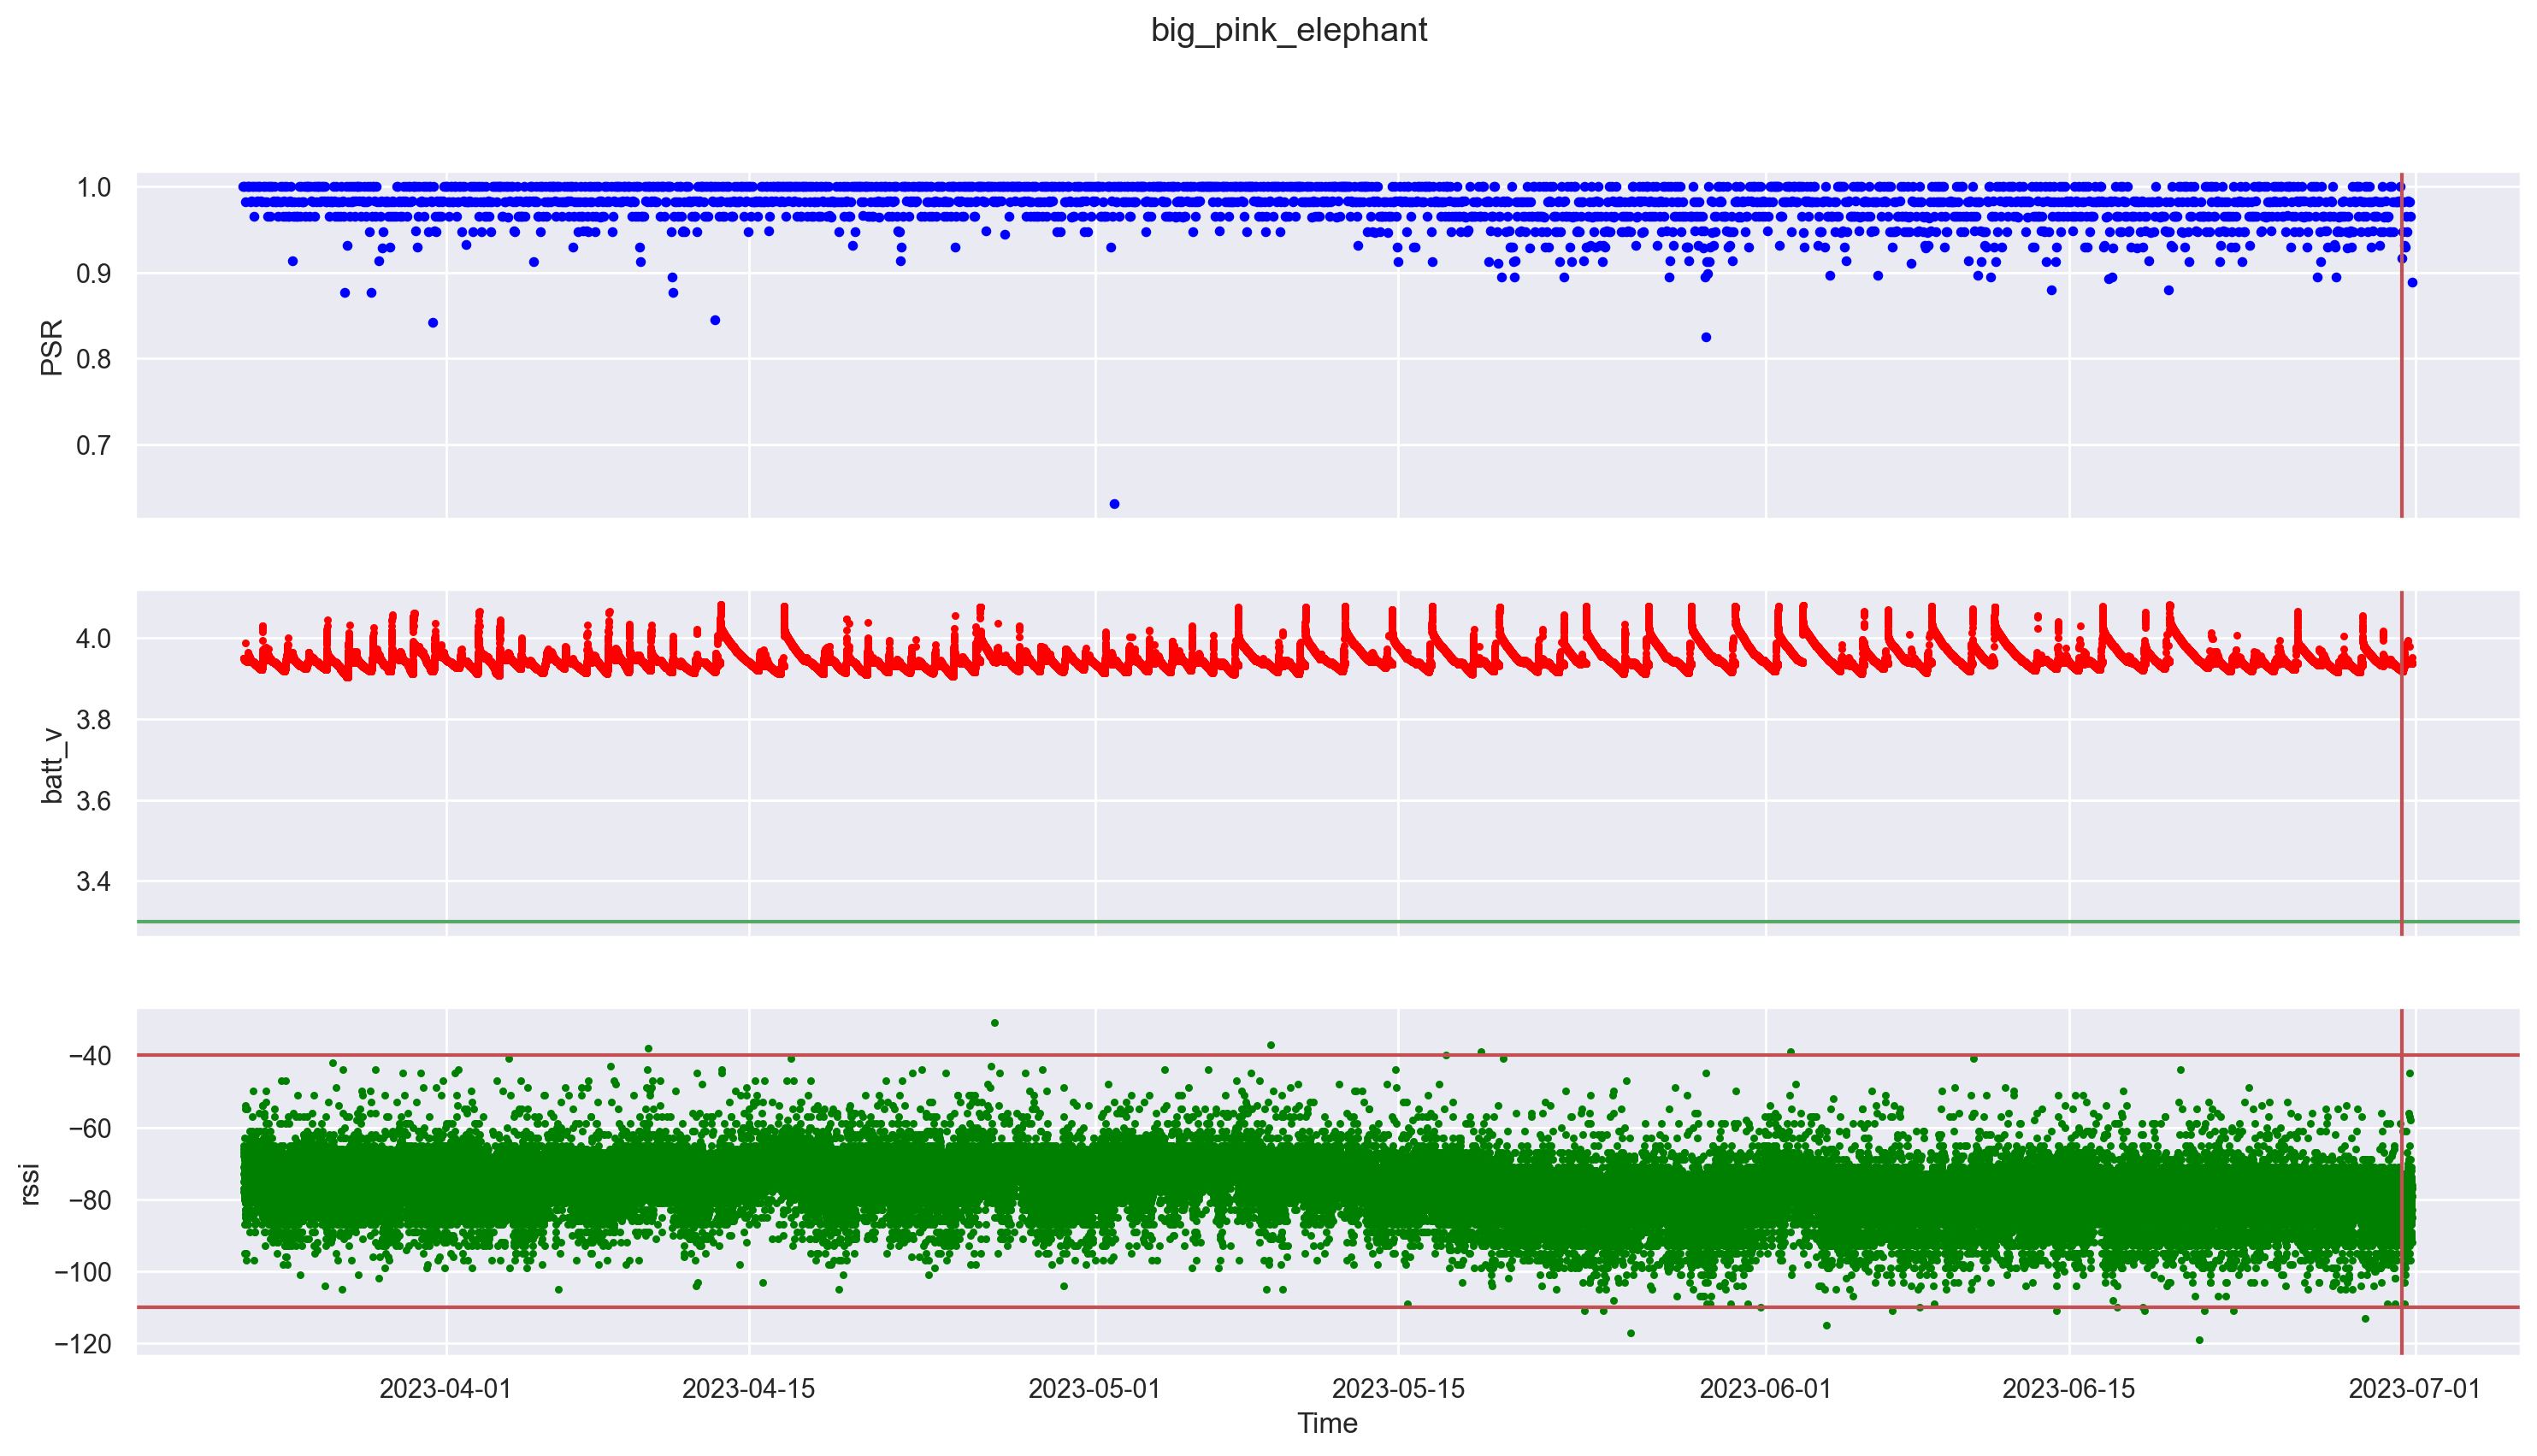

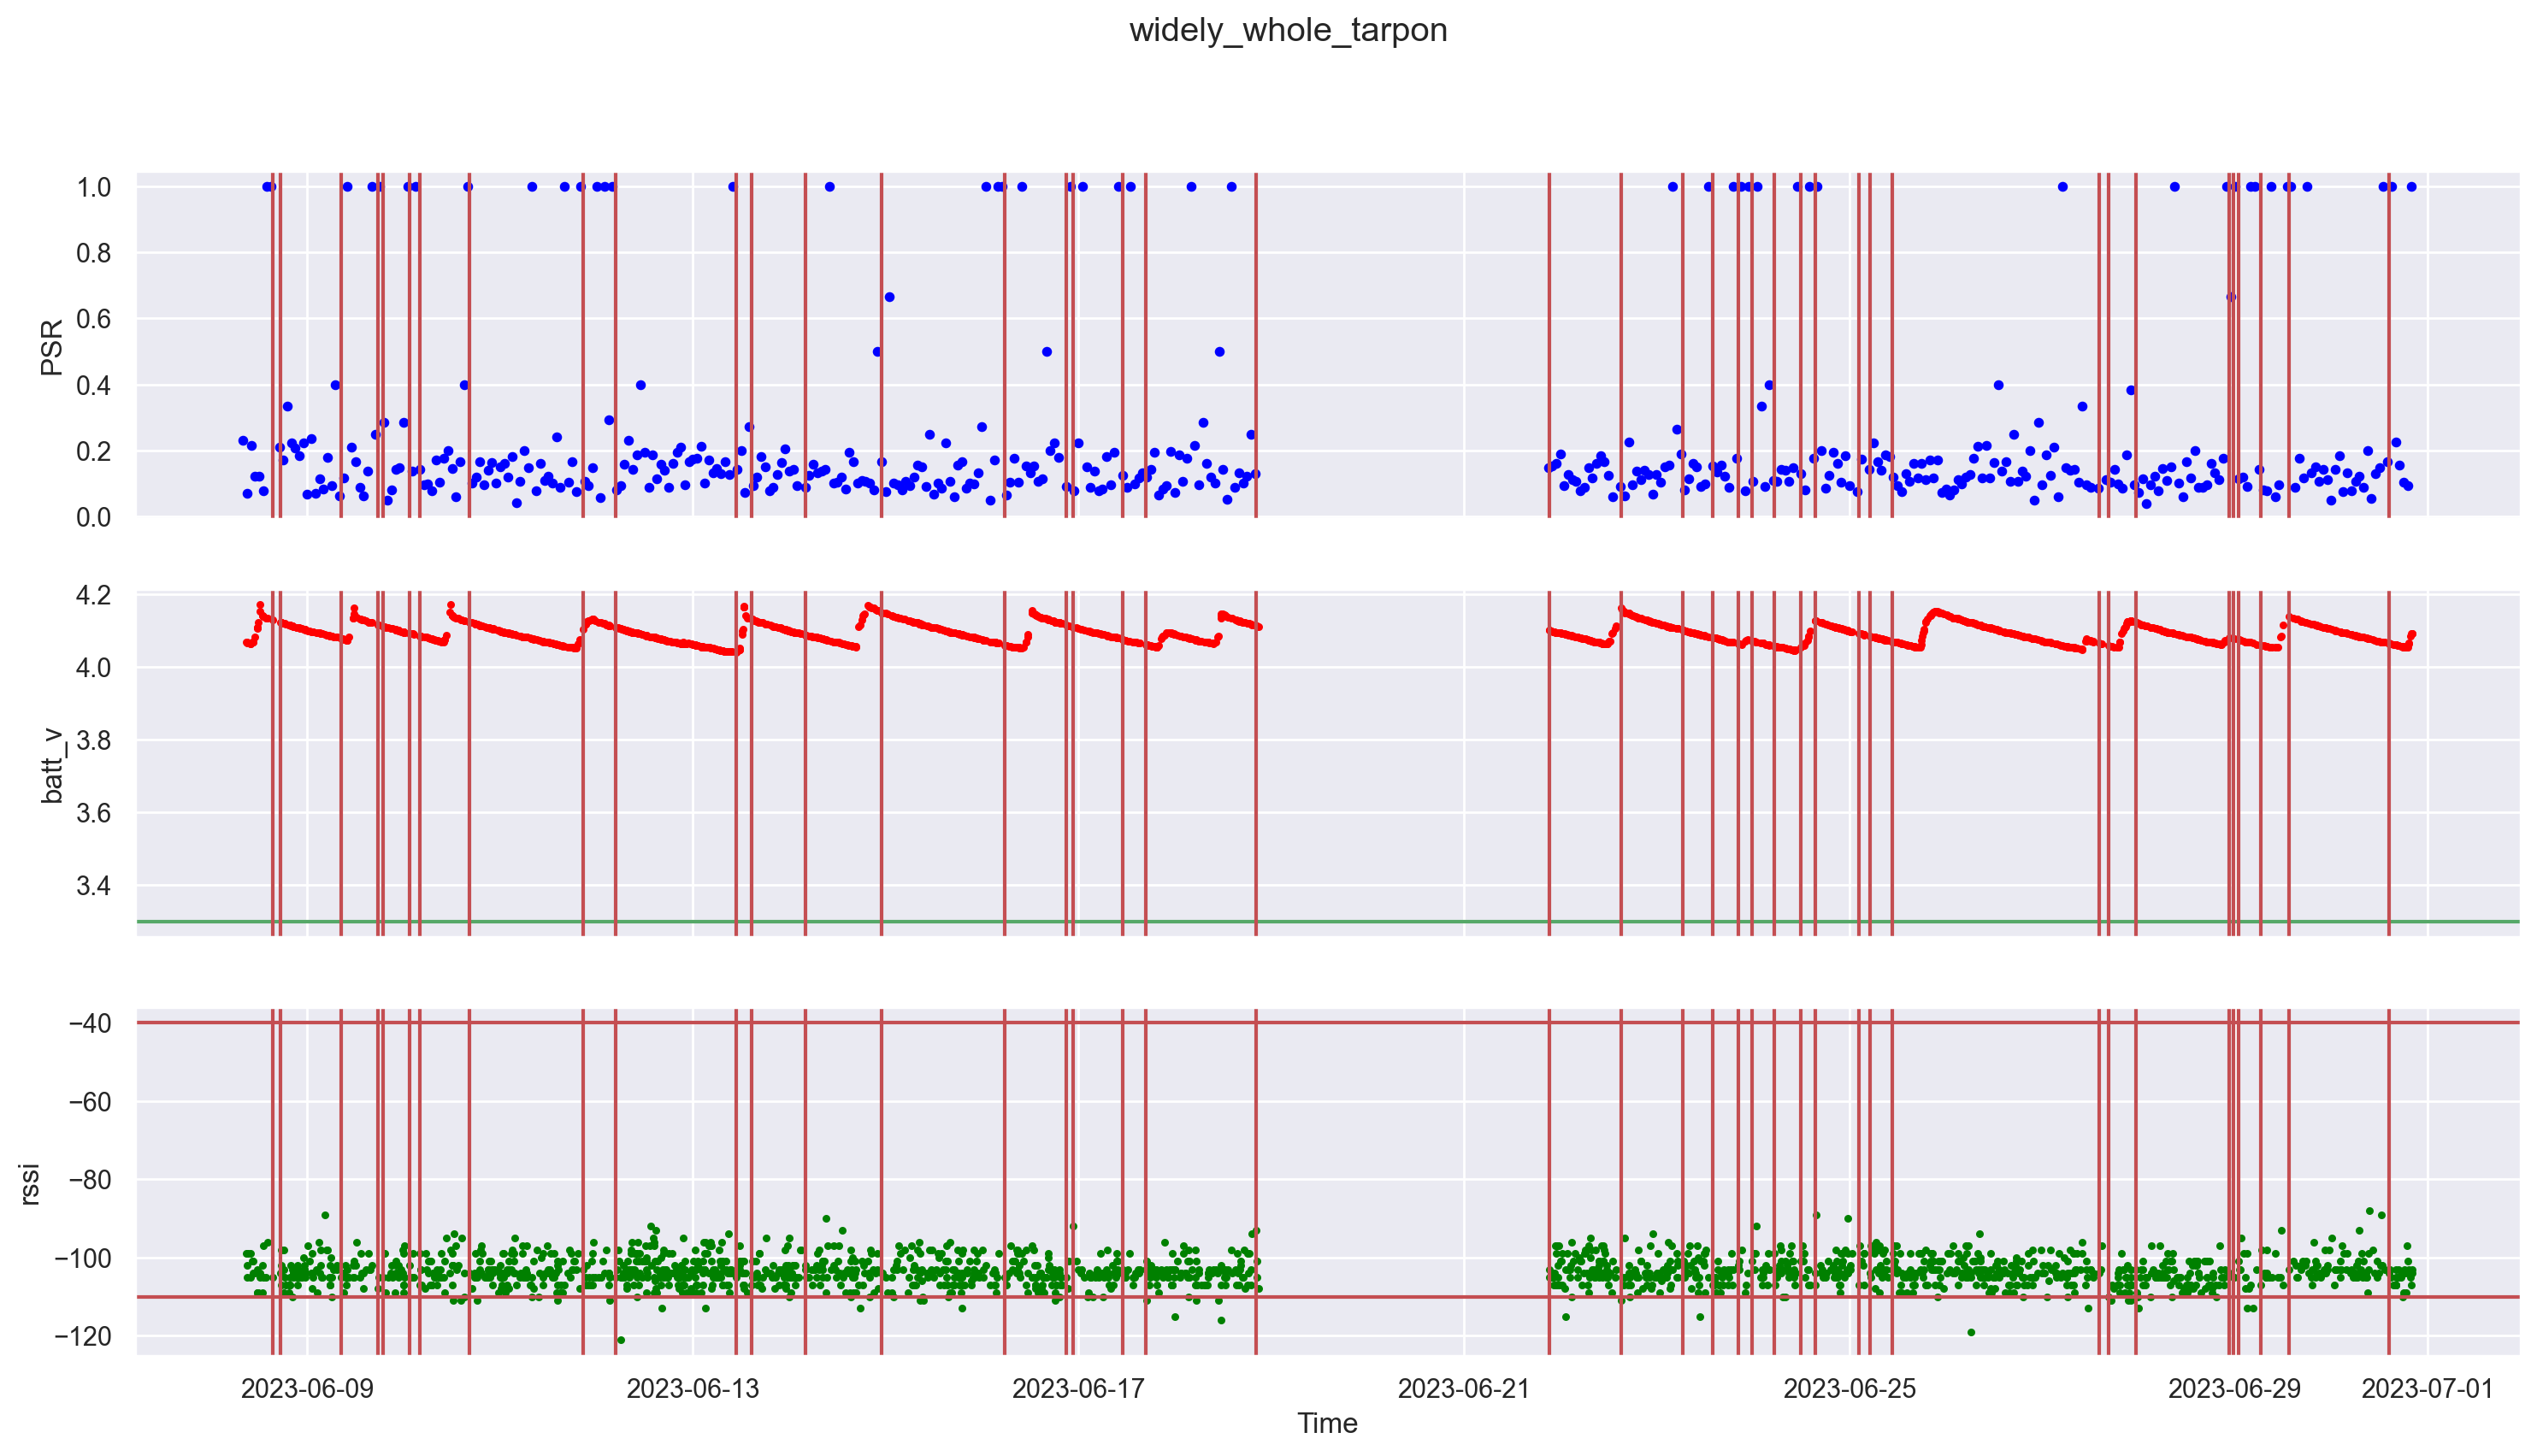

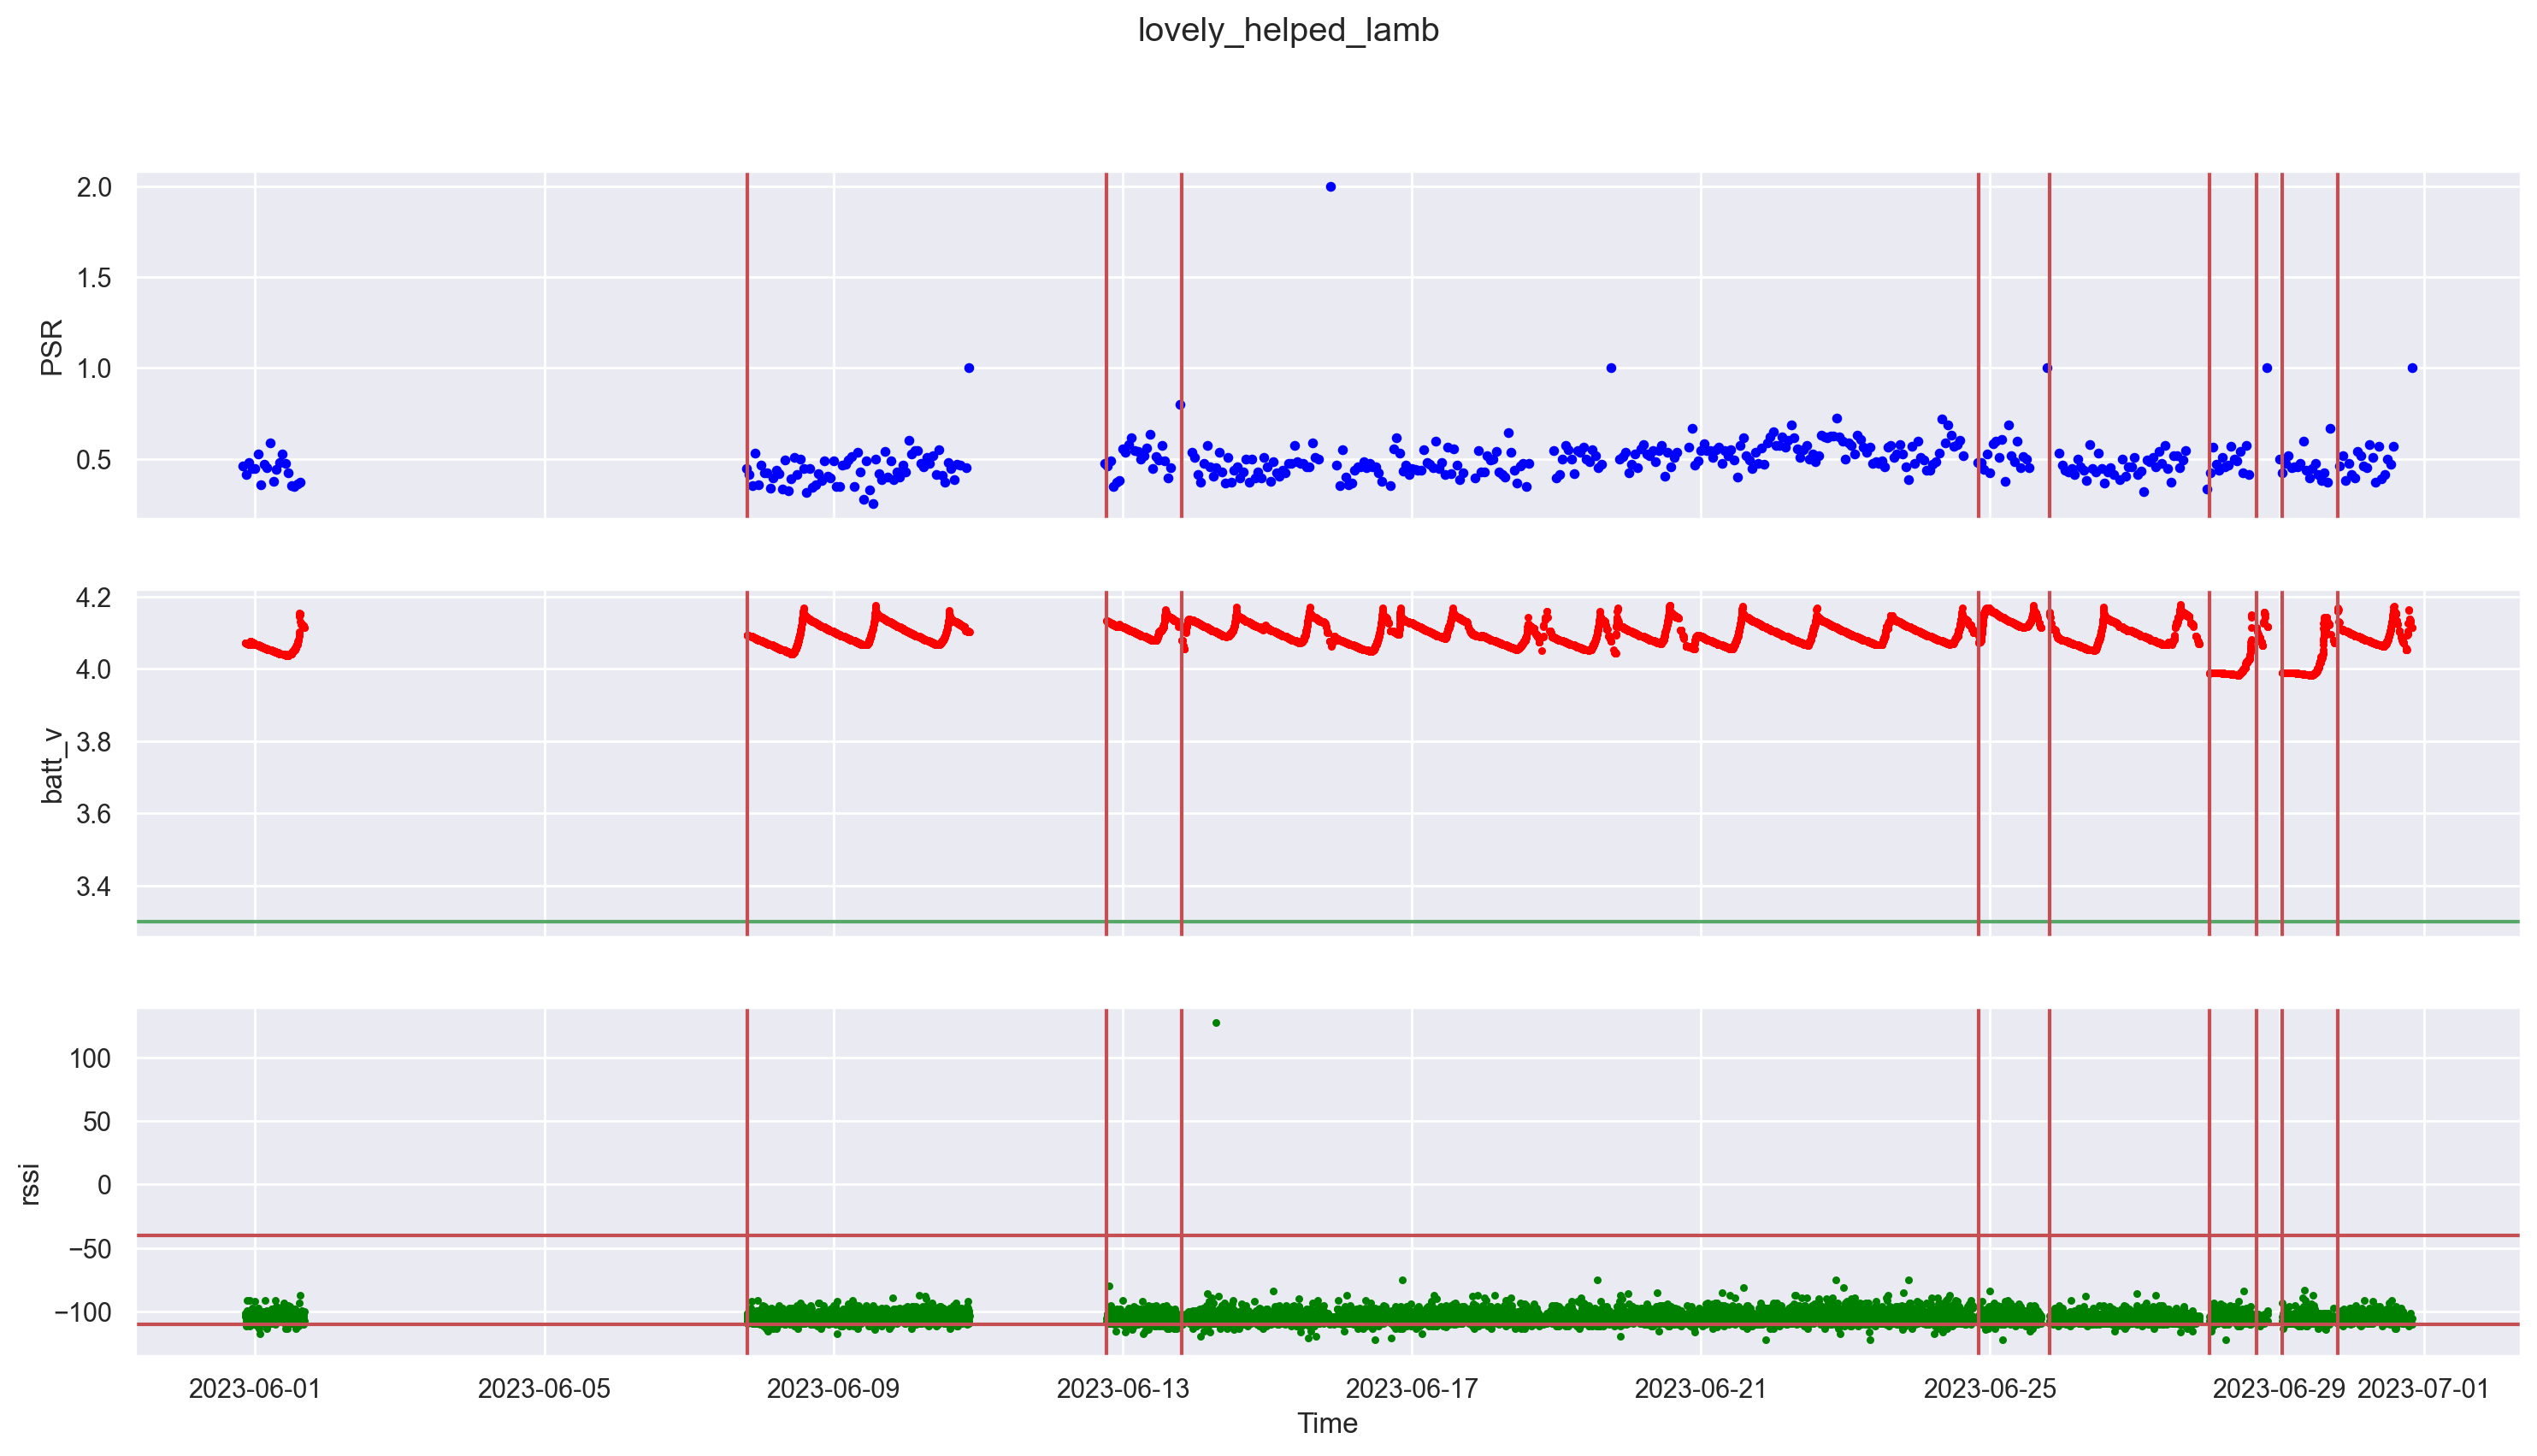

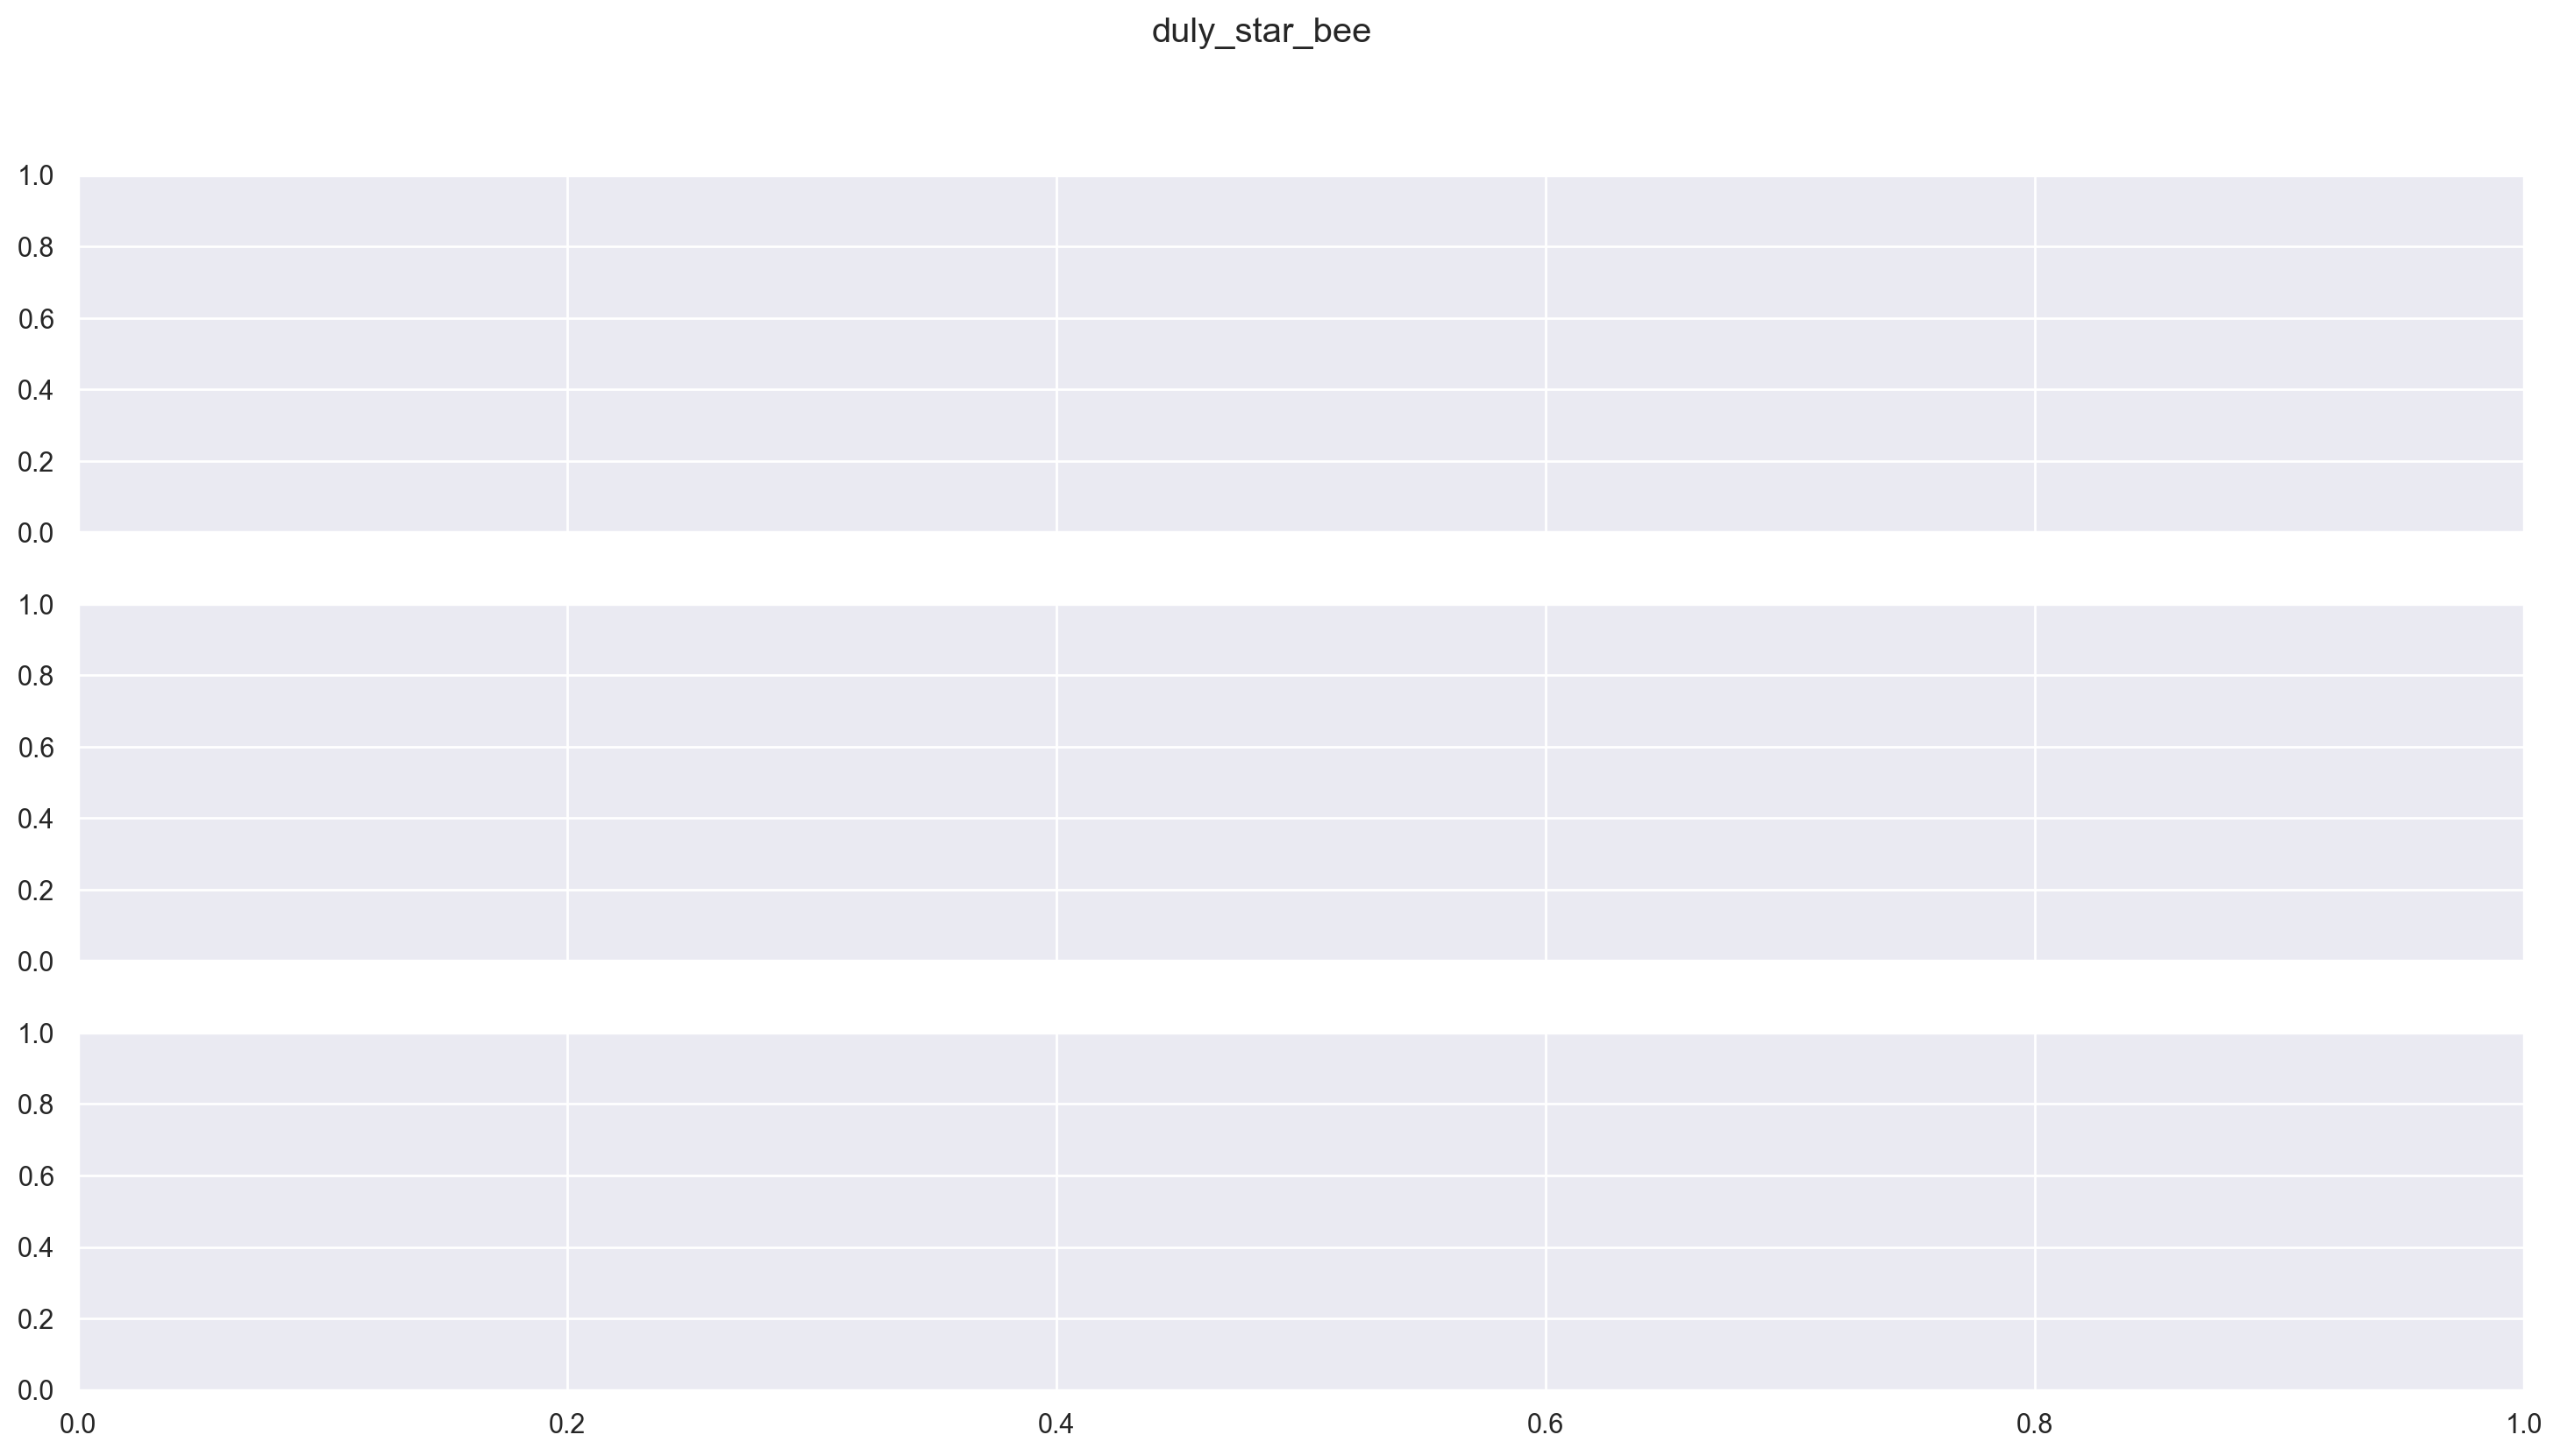

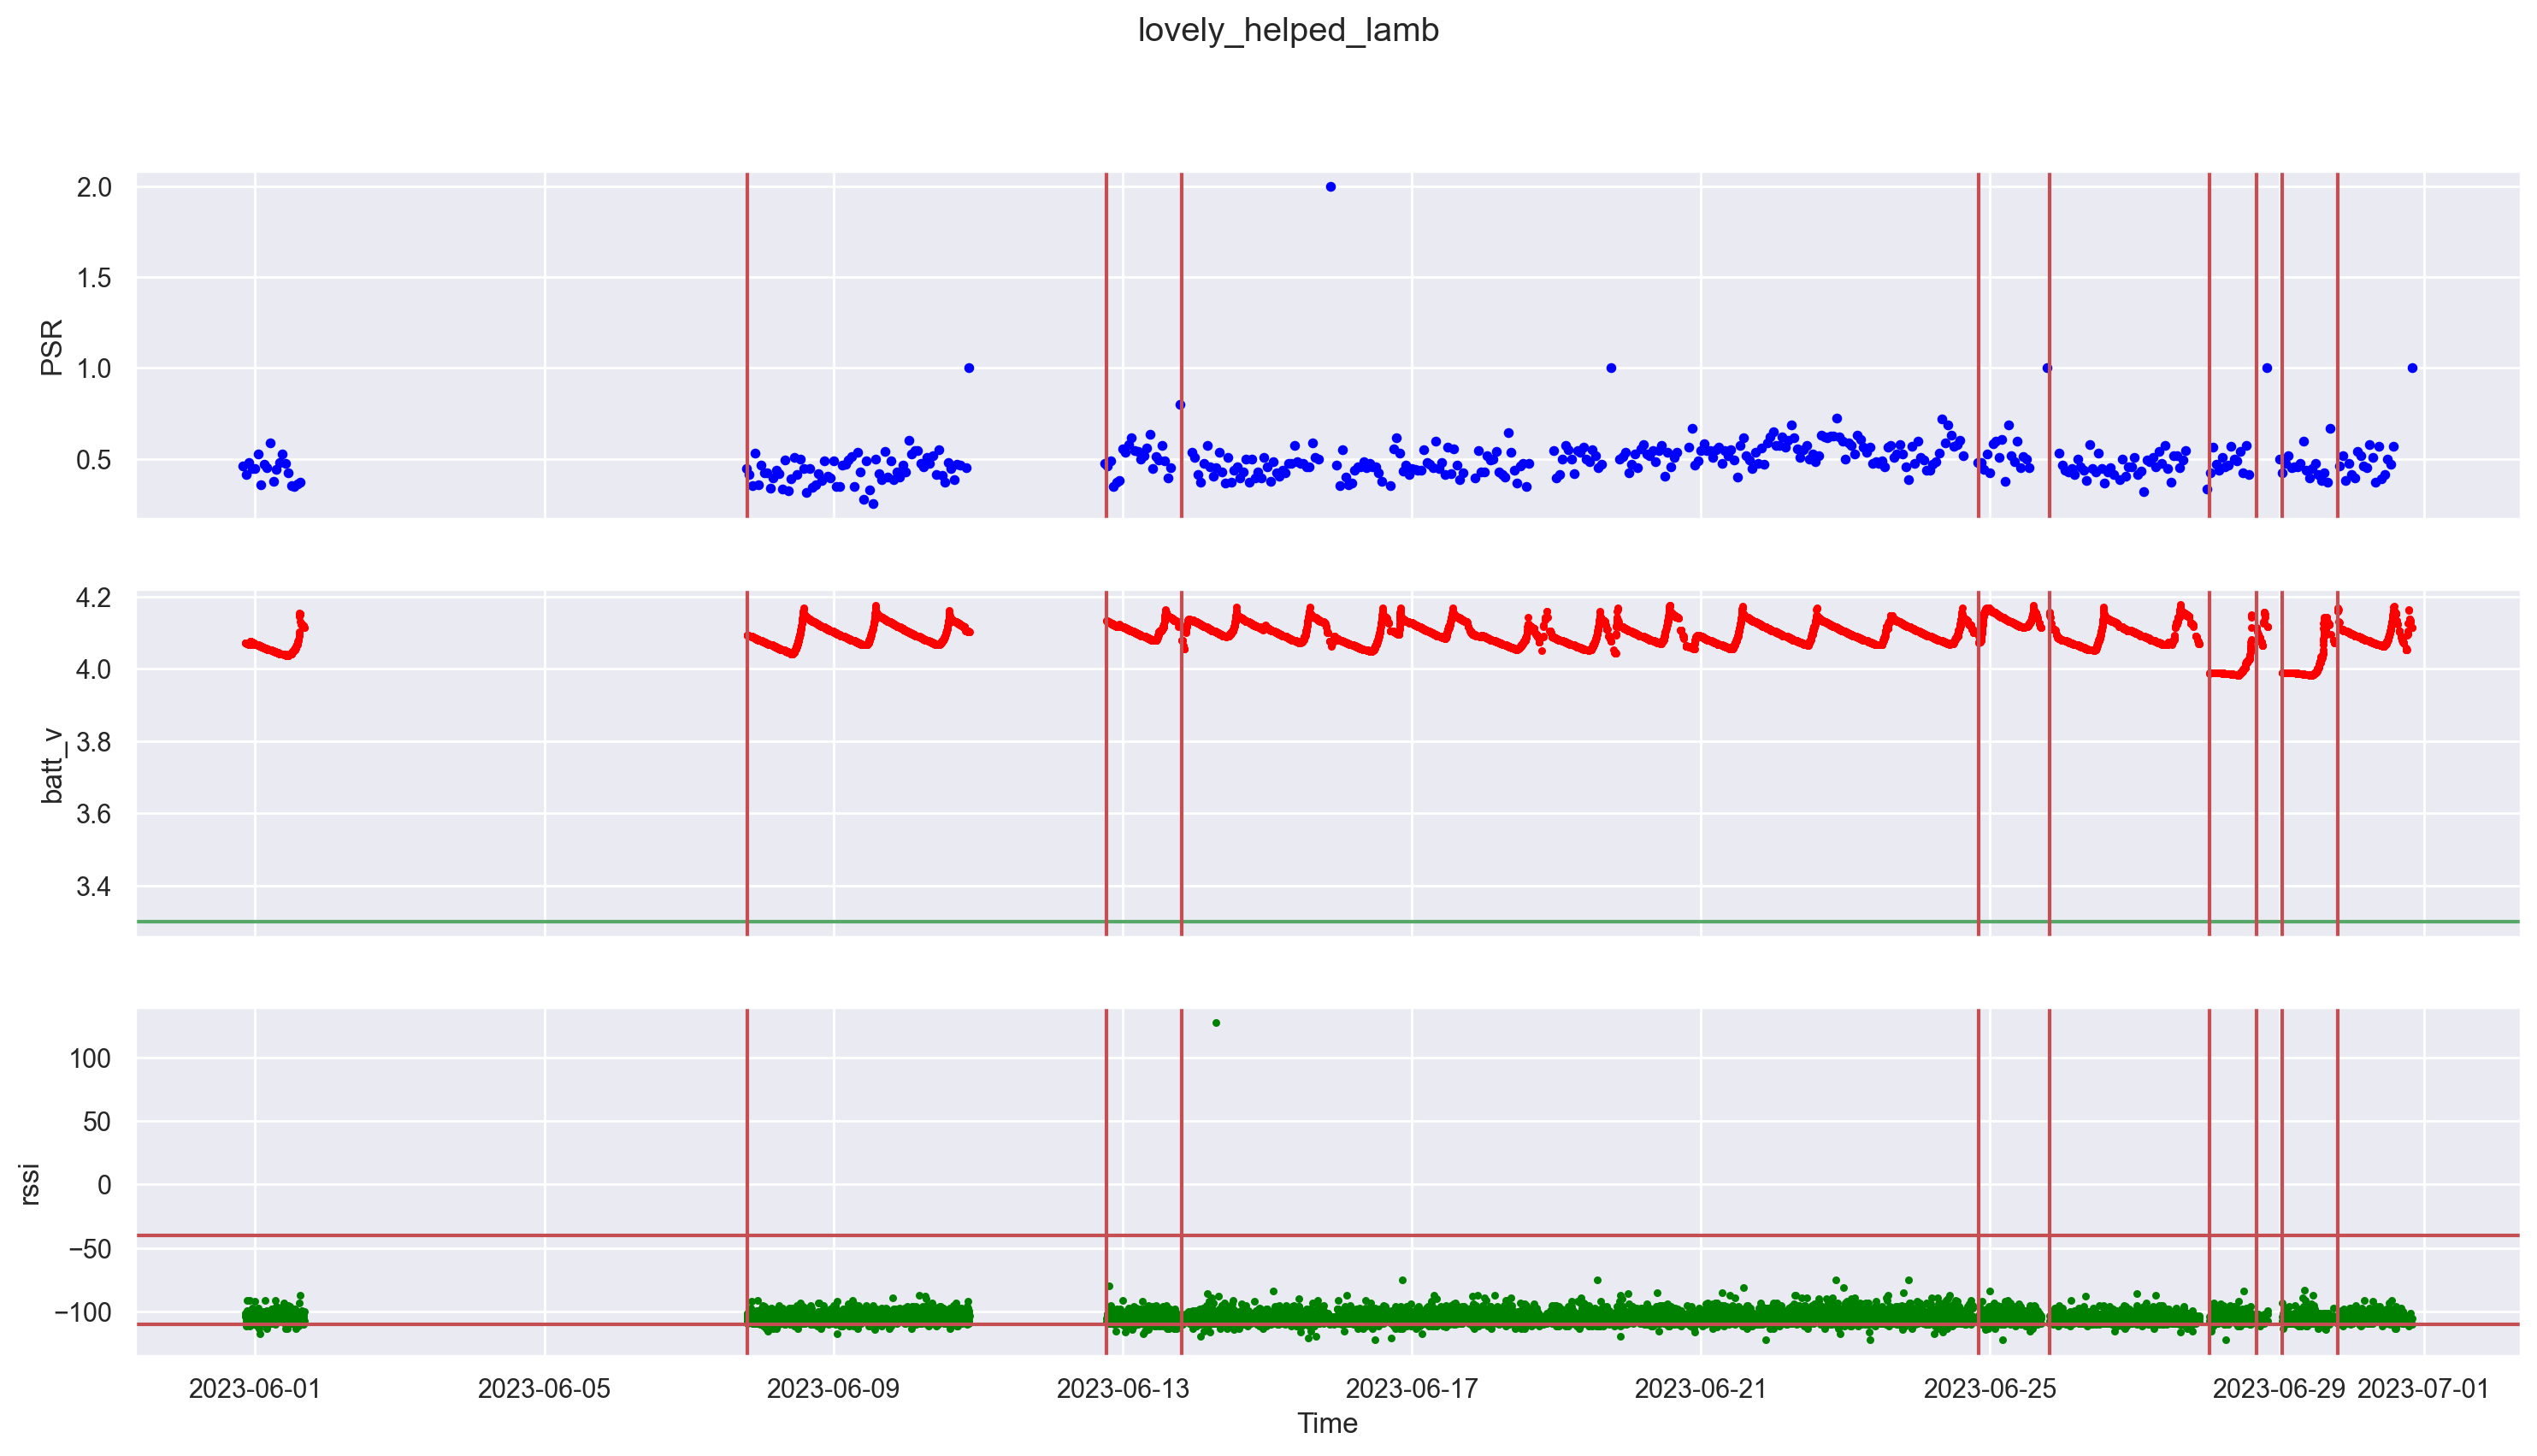

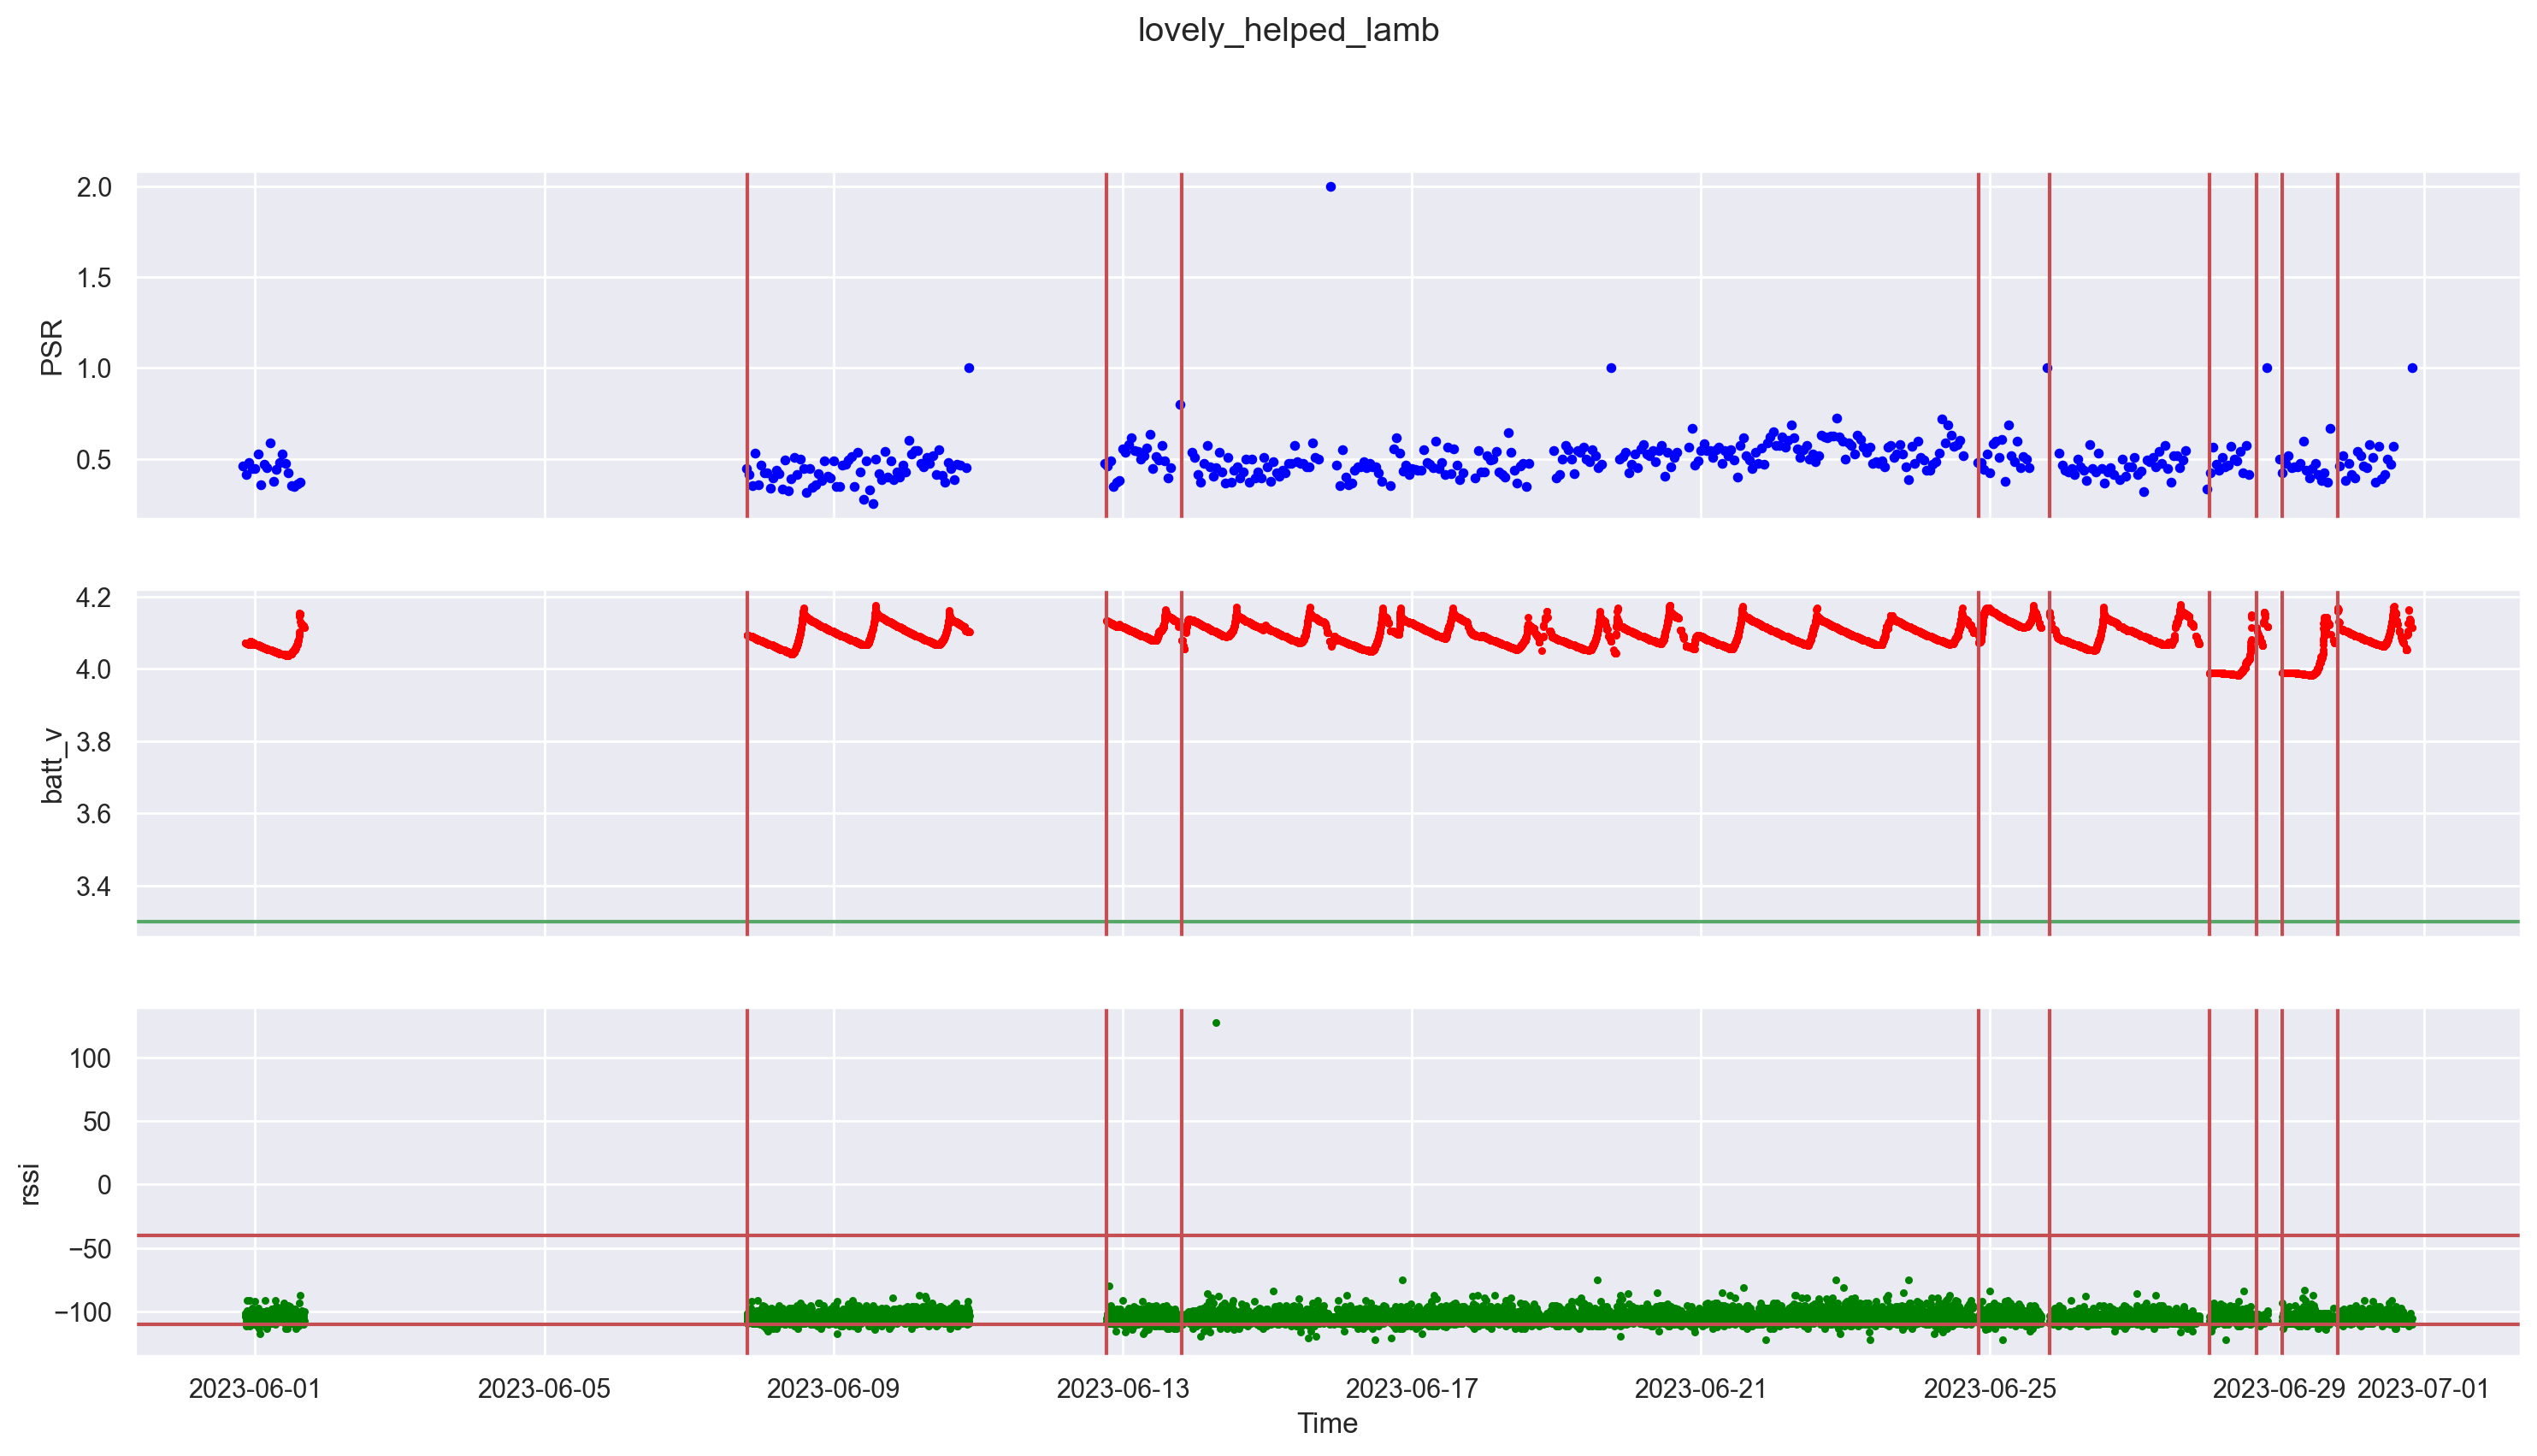

In [152]:
for i, sensor in enumerate(sensors[15:16]):
    df = dataframes[sensor]
    df['time'] = pd.to_datetime(df['time'])

    # figuring out subplot
    #plt.subplot(3,1, i+1)

    fig, (ax1,ax2, ax3) = plt.subplots(nrows=3, sharex=True)
    fig.suptitle(sensor)

    # PSR
    #hourly_average = df.set_index('time')['f_cnt'].resample('1H').agg({'PSR': lambda x: (x.count()/((x.max() - x.min())+1))})
    
    hourly_average = df.set_index('time')['f_cnt'].resample('1H').agg(func=agg_func)
    psr_data = pd.DataFrame(hourly_average)
    psr_data = psr_data.reset_index(drop=False)
    psr_data = psr_data.rename(columns={'f_cnt': 'PSR'})
    ax1.scatter(psr_data['time'], psr_data['PSR'], s = 10, c = 'blue')
    plt.xlabel('Time')
    ax1.set_ylabel('PSR')

    # battery voltage
    ax2.scatter(df['time'], df['batt_v'], s = 5, c = 'red')
    ax2.axhline(y=3.3, color = 'g')
    ax2.set_ylabel('batt_v')

    # rsi
    ax3.scatter(df['time'], df['gw_1_rssi_dbm'], s = 5, c = 'green')
    ax3.set_ylabel('rssi')
    ax3.axhline(y=-40, color = 'r')
    ax3.axhline(y=-110, color = 'r')

    failure_timestamp = list(df.loc[list(missing[sensor])]['time'])

    for time in failure_timestamp:
        ax1.axvline(x=time, color='r')
        ax3.axvline(x=time, color='r')
        ax2.axvline(x=time, color='r')
    
    ## Disables plot show
    plt.ioff()
    
    plot_name = 'plot_100/' + sensor + '.png'
    plt.savefig(plot_name)
    plt.show()
    

In [146]:
xy = dataframes['lovely_helped_lamb']
xy = xy.drop(['times', 'date'], axis=1)
xy.dropna(inplace=True)

In [137]:
hourly_average = xy.set_index('time')['f_cnt'].resample('1H').agg(func=agg_func)
psr_data = pd.DataFrame(hourly_average)
psr_data[psr_data['f_cnt']>1]

/Users/ashoktimsina/Desktop/Floodnet2/floodnet/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


f_cnt
time                               
2023-06-13 20:00:00+00:00  1.250000
2023-06-13 21:00:00+00:00  1.500000
2023-06-15 21:00:00+00:00  2.000000
2023-06-17 19:00:00+00:00  1.857143
2023-06-18 17:00:00+00:00  3.500000
2023-06-18 20:00:00+00:00  1.750000
2023-06-18 21:00:00+00:00  1.250000
2023-06-19 17:00:00+00:00  1.857143
2023-06-19 19:00:00+00:00  2.833333
2023-06-19 20:00:00+00:00  1.187500
2023-06-20 17:00:00+00:00  3.333333
2023-06-25 15:00:00+00:00       inf
2023-06-25 16:00:00+00:00  1.625000
2023-06-27 20:00:00+00:00  1.200000
2023-06-27 21:00:00+00:00  1.400000
2023-06-28 17:00:00+00:00  2.666667
2023-06-28 18:00:00+00:00  3.000000
2023-06-29 19:00:00+00:00  1.400000
2023-06-30 15:00:00+00:00  2.666667
2023-06-30 16:00:00+00:00  1.375000
2023-06-30 17:00:00+00:00  1.166667
2023-06-30 18:00:00+00:00  6.000000
2023-06-30 19:00:00+00:00  2.000000

In [147]:
print(xy[2500:4000].to_string())

      Unnamed: 0                             time       deployment_id  error_flag  batt_v                            gw_1_id  dist_mm   f_cnt  gw_1_rssi_dbm  gw_1_snr_db
2581        2581 2023-06-13 05:26:27.151000+00:00  lovely_helped_lamb           0   4.096                        nyc-mocto-1     9999   621.0           -105        -1.00
2582        2582 2023-06-13 05:29:37.015000+00:00  lovely_helped_lamb           0   4.096                        nyc-mocto-1     2808   624.0           -107        -3.00
2583        2583 2023-06-13 05:31:43.185000+00:00  lovely_helped_lamb           0   4.096                        nyc-mocto-1     9999   626.0           -105        -4.25
2584        2584 2023-06-13 05:33:48.771000+00:00  lovely_helped_lamb           0   4.096                        nyc-mocto-1     2808   628.0           -105        -2.50
2585        2585 2023-06-13 05:34:51.726000+00:00  lovely_helped_lamb           0   4.096                        nyc-mocto-1     9999   629.0         